## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective
To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
1. **`ID`**: Customer ID
2.**`Age`**: Customer’s age in completed years
3.**`Experience`**: #years of professional experience
4.**`Income`**: Annual income of the customer (in thousand dollars)
5.**`ZIP Code`**: Home Address ZIP code.
6.**`Family`**: the Family size of the customer
7.**`CCAvg`**: Average spending on credit cards per month (in thousand dollars)
8.**`Education`**: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
9.**`Mortgage`**: Value of house mortgage if any. (in thousand dollars)
10.**`Personal_Loan`**: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
11.**`Securities_Account`**: Does the customer have securities account with the bank? (0: No, 1: Yes)
12.**`CD_Account`**: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
13.**`Online`**: Do customers use internet banking facilities? (0: No, 1: Yes)
14.**`CreditCard`**: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing REQUIRED libraries:

In [2]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.3.2 sklearn-pandas==2.2.0 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [3]:
# Numerical and statistical libraries: -------------------------------------

# Importing the pandas library, which provides data structures
# and functions needed to manipulate structured data more easily.
# Pandas is useful for working with data in DataFrame format,
# which is similar to a table in a database or an Excel spreadsheet.
import pandas as pd

# Importing the numpy library, which adds support for large,
# multi-dimensional arrays and matrices, along with a
# collection of mathematical functions to operate on these arrays.
# Numpy is useful for numerical computations, manipulating data,
# performing complex mathematical operations, and conducting
# powerful statistical analyses.
import numpy as np

# Data visualization libraries: ------------------------------------------

# Importing the pyplot module from the matplotlib library,
# which is a plotting library used for creating static, interactive,
# and animated visualizations in Python.
# Matplotlib provides a wide range of plotting capabilities,
# including line plots, scatter plots, bar charts, histograms, and more.
# The pyplot module provides a MATLAB-like interface,
# making it easy to create and customize plots.
import matplotlib.pyplot as plt

# Importing the seaborn library, which is built on top of matplotlib
# and provides a high-level interface for drawing attractive
# and informative statistical graphics.
# Seaborn offers built-in themes and color palettes to make it easy to create
# visually appealing plots.
# It is particularly useful for visualizing complex datasets,
# with functions for creating heatmaps, time series plots,
# and more advanced statistical visualizations.
import seaborn as sns


# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# ============================================================================
# Typical sequence to build a ML prediction model using Decision Trees:
#
# 1- Select an attribute of data and make all possible splits in data.
# 2- Calculate the Gini impurity after each split.
# 3- Repeat the steps for every attribute present in the data.
# 4- Decide the best split based on the lowest Gini impurity.
# 5- Repeat the complete process until the stopping criterion is reached or
#    the tree has achieved homogeneity in leaves.
#
# Decision Tree Classifier & Modelling Libraries: ----------------------------

# ML Library to split data
from sklearn.model_selection import train_test_split

# ML Algorythm to build model for prediction using Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

# ML Algorythm to visualize Decision Tree
from sklearn.tree import plot_tree

# ML Algorythm function to get feature importance:
# It offers decision tree algorithms for both classification and regression tasks.
# Decision trees can be used to determine feature importance,
# which indicates how influential each feature is in making predictions.
from sklearn import tree

# ML Algorythm function to get feature importance Part II:
# Importing the permutation_importance function from the sklearn.inspection module.
# Function calculates feature importance by evaluating the decrease
# in a model's performance when the values of a feature are randomly shuffled.
# Permutation importance is a model-agnostic method, meaning it can be used
# with any trained model to assess the importance of features.
from sklearn.inspection import permutation_importance as pmp


# ML Decision Tree Algorythms Metric scores definitions:
'''
=========> Accuracy:
Description: The ratio of correctly predicted instances to the total instances.
Power: Measures the overall effectiveness of the model.

=========> Precision:
Description: The ratio of true positive predictions to the total predicted positives.
Power: Indicates how many of the predicted positive instances are actually positive.

=========> Recall (Sensitivity):
Description: The ratio of true positive predictions to the total actual positives.
Power: Measures the model's ability to identify all relevant instances.

=========> F1 Score:
Description: The harmonic mean of precision and recall.
Power: Provides a single metric that balances precision and recall,
       useful for imbalanced datasets.

=========> ROC-AUC (Receiver Operating Characteristic - Area Under the Curve):
Description: Represents the model's ability to distinguish between classes,
             plotted as true positive rate versus false positive rate.
Power: Evaluates the trade-off between sensitivity and specificity
             across different thresholds.

=========> Mean Squared Error (MSE):
Description: The average squared difference between predicted and actual values.
Power: Penalizes larger errors more than smaller ones,
       providing a clear indication of model accuracy.

=========> Root Mean Squared Error (RMSE):
Description: The square root of the average squared difference between
             predicted and actual values.
Power: Offers a measure of the model's prediction error in the same units
             as the target variable.

=========> Mean Absolute Error (MAE):
Description: The average absolute difference between predicted and actual values.
Power: Provides a straightforward measure of prediction accuracy w
       ithout emphasizing large errors.

=========> R-squared (Coefficient of Determination):
Description: The proportion of the variance in the dependent variable
             that is predictable from the independent variables.
Power: Indicates the goodness-of-fit of the model, showing how well the model
       explains the variability of the target variable.
'''


# ML Algorythm function to get these metric scores
from sklearn.metrics import (
    accuracy_score,
    recall_score,
    precision_score,
    f1_score,
    roc_auc_score,
    mean_squared_error,
    mean_absolute_error,
    r2_score,
    make_scorer,
    confusion_matrix
)

# ML Algorythm to finetune different models
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [4]:
# Mount Google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Read the data file
Loan = pd.read_csv("/content/Loan_Modeling.csv")

In [6]:
# Loan becomes your backup of the original data. Make a copy to use (data) going forward.
data = Loan.copy()

## Data Overview

1. Make observations next.
2. Conduct some sanity checks.
3. Data cleaning, if necessary.

### Explore rows of the dataset.

In [7]:
## Quick look at the begining of the dataset:
data.head(10)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


In [11]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=data)

https://docs.google.com/spreadsheets/d/1WvHbTkDM41oFGbNB7n84h0HJq7m-T0Fx8djiaRYrIWU#gid=0


In [ ]:
## Quick look at the end of the dataset:
data.tail(10)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
4990,4991,55,25,58,95023,4,2.00,3,219,0,0,0,0,1
4991,4992,51,25,92,91330,1,1.90,2,100,0,0,0,0,1
4992,4993,30,5,13,90037,4,0.50,3,0,0,0,0,0,0
4993,4994,45,21,218,91801,2,6.67,1,0,0,0,0,1,0
4994,4995,64,40,75,94588,3,2.00,3,0,0,0,0,1,0
4995,4996,29,3,40,92697,1,1.90,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.40,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.30,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.50,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.80,1,0,0,0,0,1,1


### Shape of the dataset.

In [12]:
##  Display data rows count and columns count:
data.shape

(5000, 14)

### Data types of the columns for the dataset

In [13]:
## Display dataframe datatype elements:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


### View Statistical Summary

In [14]:
## Statistical summary of the data. Round-off to two decimal spaces and transpose for easier reading:
data.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.50,1443.52,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.34,11.46,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.10,11.47,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.77,46.03,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93169.26,1759.46,90005.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.40,1.15,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.94,1.75,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.88,0.84,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.50,101.71,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.10,0.29,0.0,0.00,0.0,0.00,1.0


**Observation**:
* Stats for ID column data are not necessary.

### Drop unnecessary columns

In [15]:
# Given the provided data dictionary and code, the ID column can be dropped.
# This is because it serves as a unique identifier for each customer and
# does not provide any (predictive) value for whether a customer will likely purchase a personal loan.
print(data.columns)
print(data.head())

# Check if ID has already been dropped. Drop it if it has not.
if 'ID' in data.columns:
    data = data.drop(['ID'], axis=1)
    print("Column 'ID' dropped successfully.")
else:
    print("\n --->> Column 'ID' is not present in the DataFrame. It might have been dropped already.")

print("-" * 60)
print("After dropping Column = ID")
print(data.columns)
print(data.head())

Index(['ID', 'Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal_Loan', 'Securities_Account',
       'CD_Account', 'Online', 'CreditCard'],
      dtype='object')
   ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49    91107       4    1.6          1         0   
1   2   45          19      34    90089       3    1.5          1         0   
2   3   39          15      11    94720       1    1.0          1         0   
3   4   35           9     100    94112       1    2.7          2         0   
4   5   35           8      45    91330       4    1.0          2         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0            

In [ ]:
## ID Column removed, check:
data.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.34,11.46,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.10,11.47,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,73.77,46.03,8.0,39.0,64.0,98.0,224.0
ZIPCode,5000.0,93169.26,1759.46,90005.0,91911.0,93437.0,94608.0,96651.0
Family,5000.0,2.40,1.15,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.94,1.75,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.88,0.84,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.50,101.71,0.0,0.0,0.0,101.0,635.0
Personal_Loan,5000.0,0.10,0.29,0.0,0.0,0.0,0.0,1.0
Securities_Account,5000.0,0.10,0.31,0.0,0.0,0.0,0.0,1.0


## Data Preprocessing

1. Missing value treatment (if needed)
2. Feature engineering (if needed)
3. Outlier detection and treatment (if needed)
4. Preparing data for modeling
5. Any other preprocessing steps (if needed)

### Checking for Anomalous Values

1. Descriptive Statistics and Visualization

* **Summary Statistics**: Start by calculating basic descriptive statistics like mean, median, standard deviation, minimum, and maximum for each numerical column. This can quickly highlight potential outliers. <font color=green>**[Done Above]**</font>

* **Histograms and Box Plots**: Visualize the distribution of your data using histograms and box plots to identify values that fall far outside the typical range.

2. Z-Score Calculations

* **Z-Scores**: Z-scores measure how many standard deviations a data point is from the mean. Values with a high absolute Z-score (e.g., greater than 3) are often considered outliers.

3. Interquartile Range (IQR)

* **IQR**: The IQR is the range between the first quartile (25th percentile) and the third quartile (75th percentile). Values that fall below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR are often considered outliers.

4. Domain Knowledge

* **Context is Key**: Always consider the context of your data. Some values that might appear as outliers statistically could be valid based on domain knowledge. For example, a very high income might be perfectly reasonable for certain professions.

* *Important Considerations:*

* **Handling Outliers**: Once you've identified anomalies, you need to decide how to handle them. Options include removing them, replacing them with a more reasonable value (like the mean or median), or using robust statistical methods that are less sensitive to outliers.
* **Data Quality**: Anomalous values can sometimes indicate data entry errors or other data quality issues. Investigate the source of the anomalies to determine if further data cleaning is necessary.

Remember to choose the methods that are most appropriate for your specific dataset and the goals of your analysis.

In [ ]:
# Non-repeating values listed:
data["Age"].unique()

array([25, 45, 39, 35, 37, 53, 50, 34, 65, 29, 48, 59, 67, 60, 38, 42, 46,
       55, 56, 57, 44, 36, 43, 40, 30, 31, 51, 32, 61, 41, 28, 49, 47, 62,
       58, 54, 33, 27, 66, 24, 52, 26, 64, 63, 23])

In [22]:
# Improved

# Specify the column name
column_name = 'Age'

# ANSI escape codes for bold and orange
bold_orange = "\033[1;33m"  # Bold + Orange
reset = "\033[0m"  # Reset to normal

# Print the column name, unique values, and data type with formatting
print(f"Column: {bold_orange}{column_name}{reset}")
print(f"Unique values in '{column_name}' column: {data[column_name].unique()}") # Non-repeating values listed:
print(f"Data type of '{column_name}' column: {bold_orange}{data[column_name].dtype}{reset}")

Column: Age
Unique values in 'Age' column: [25 45 39 35 37 53 50 34 65 29 48 59 67 60 38 42 46 55 56 57 44 36 43 40
 30 31 51 32 61 41 28 49 47 62 58 54 33 27 66 24 52 26 64 63 23]
Data type of 'Age' column: int64


In [23]:
# Improved

# Specify the column name
column_name = 'Income'

# ANSI escape codes for bold and orange
bold_orange = "\033[1;33m"  # Bold + Orange
reset = "\033[0m"  # Reset to normal

# Print the column name, unique values, and data type with formatting
print(f"Column: {bold_orange}{column_name}{reset}")
print(f"Unique values in '{column_name}' column: {data[column_name].unique()}") # Non-repeating values listed:
print(f"Data type of '{column_name}' column: {bold_orange}{data[column_name].dtype}{reset}")

Column: Income
Unique values in 'Income' column: [ 49  34  11 100  45  29  72  22  81 180 105 114  40 112 130 193  21  25
  63  62  43 152  83 158  48 119  35  41  18  50 121  71 141  80  84  60
 132 104  52 194   8 131 190  44 139  93 188  39 125  32  20 115  69  85
 135  12 133  19  82 109  42  78  51 113 118  64 161  94  15  74  30  38
   9  92  61  73  70 149  98 128  31  58  54 124 163  24  79 134  23  13
 138 171 168  65  10 148 159 169 144 165  59  68  91 172  55 155  53  89
  28  75 170 120  99 111  33 129 122 150 195 110 101 191 140 153 173 174
  90 179 145 200 183 182  88 160 205 164  14 175 103 108 185 204 154 102
 192 202 162 142  95 184 181 143 123 178 198 201 203 189 151 199 224 218]
Data type of 'Income' column: int64


In [24]:
# Improved

# Specify the column name
column_name = 'Family'

# ANSI escape codes for bold and orange
bold_orange = "\033[1;33m"  # Bold + Orange
reset = "\033[0m"  # Reset to normal

# Print the column name, unique values, and data type with formatting
print(f"Column: {bold_orange}{column_name}{reset}")
print(f"Unique values in '{column_name}' column: {data[column_name].unique()}") # Non-repeating values listed:
print(f"Data type of '{column_name}' column: {bold_orange}{data[column_name].dtype}{reset}")

Column: Family
Unique values in 'Family' column: [4 3 1 2]
Data type of 'Family' column: int64


In [25]:
# Improved

# Specify the column name
column_name = 'CCAvg'

# ANSI escape codes for bold and orange
bold_orange = "\033[1;33m"  # Bold + Orange
reset = "\033[0m"  # Reset to normal

# Print the column name, unique values, and data type with formatting
print(f"Column: {bold_orange}{column_name}{reset}")
print(f"Unique values in '{column_name}' column: {data[column_name].unique()}") # Non-repeating values listed:
print(f"Data type of '{column_name}' column: {bold_orange}{data[column_name].dtype}{reset}")

Column: CCAvg
Unique values in 'CCAvg' column: [ 1.6   1.5   1.    2.7   0.4   0.3   0.6   8.9   2.4   0.1   3.8   2.5
  2.    4.7   8.1   0.5   0.9   1.2   0.7   3.9   0.2   2.2   3.3   1.8
  2.9   1.4   5.    2.3   1.1   5.7   4.5   2.1   8.    1.7   0.    2.8
  3.5   4.    2.6   1.3   5.6   5.2   3.    4.6   3.6   7.2   1.75  7.4
  2.67  7.5   6.5   7.8   7.9   4.1   1.9   4.3   6.8   5.1   3.1   0.8
  3.7   6.2   0.75  2.33  4.9   0.67  3.2   5.5   6.9   4.33  7.3   4.2
  4.4   6.1   6.33  6.6   5.3   3.4   7.    6.3   8.3   6.    1.67  8.6
  7.6   6.4  10.    5.9   5.4   8.8   1.33  9.    6.7   4.25  6.67  5.8
  4.8   3.25  5.67  8.5   4.75  4.67  3.67  8.2   3.33  5.33  9.3   2.75]
Data type of 'CCAvg' column: float64


In [27]:
## Import textwrap module, which provides functions for wrapping and formatting text strings.
import textwrap

# Specify the column name
column_name = 'Age'

# ANSI escape codes for bold and orange
bold_orange = "\033[1;33m"  # Bold + Orange
reset = "\033[0m"  # Reset to normal

# Get unique values sorted
unique_values = ' '.join(map(str, sorted(data[column_name].unique())))

# Organize the data to fit into 80 characters width rows.
wrapped_output = textwrap.fill(unique_values, width=80)

# Print the column name, unique values, and data type with formatting
print(f"Column: {bold_orange}{column_name}{reset}")
print(f"Unique values in '{column_name}' column (wrapped for readability):\n{bold_orange}{wrapped_output}{reset}")
print(f"Data type of '{column_name}' column: {bold_orange}{data[column_name].dtype}{reset}")

Column: Age
Unique values in 'Age' column (wrapped for readability):
23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67
Data type of 'Age' column: int64


In [ ]:
## Import textwrap module, which provides functions for wrapping and formatting text strings.
import textwrap

# Assign sorted values into an organized array for examination.
unique_values = ' '.join(map(str, sorted(data["Mortgage"].unique())))

# Organize the data to fit into 80 characters width rows.
# It automatically inserts newlines to create lines that fit within this width.
wrapped_output = textwrap.fill(unique_values, width=80)
print(wrapped_output)

0 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100
101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120
121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140
141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160
161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200
201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220
221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240
241 242 243 244 245 246 247 248 249 250 251 252 253 255 256 257 258 259 260 262
263 264 265 266 267 268 270 271 272 273 275 276 277 278 280 281 282 283 284 285
286 287 289 290 292 293 294 295 296 297 298 299 300 301 302 303 304 305 306 307
308 309 310 311 312 313 314 315 318 319 321 322 323 325 326 327 328 329 330 331
333 334 336 337 341 342 343 344 345 351

In [ ]:
# Non-repeating values listed:
data["Experience"].unique()

array([ 1, 19, 15,  9,  8, 13, 27, 24, 10, 39,  5, 23, 32, 41, 30, 14, 18,
       21, 28, 31, 11, 16, 20, 35,  6, 25,  7, 12, 26, 37, 17,  2, 36, 29,
        3, 22, -1, 34,  0, 38, 40, 33,  4, -2, 42, -3, 43])

#### Observations:
*  Some entries are incorrectly entered with <font color=red> negative </font> years of experience.
* These will need to be removed or replaced with positive values.

In [ ]:
# checking for experience <0:
data[data["Experience"] < 0]["Experience"].unique()

array([-1, -2, -3])

In [ ]:
# Replacing the experience values with positive values within the same dataset file:
data["Experience"].replace(-1, 1, inplace=True)
data["Experience"].replace(-2, 2, inplace=True)
data["Experience"].replace(-3, 3, inplace=True)

In [ ]:
## Revisit to review Experience column and ensure no negative numbers remain:
data["Experience"].unique()

array([ 1, 19, 15,  9,  8, 13, 27, 24, 10, 39,  5, 23, 32, 41, 30, 14, 18,
       21, 28, 31, 11, 16, 20, 35,  6, 25,  7, 12, 26, 37, 17,  2, 36, 29,
        3, 22, 34,  0, 38, 40, 33,  4, 42, 43])

#### Observations:
*  All entries are <font color=red> positive </font> now for years of experience.

### Feature Engineering

In [ ]:
# checking the number of uniques in the zip code:
data["ZIPCode"].nunique()

467

#### Observations:
*  It may be necessary to group ZIPs under some category since there are <font color=red> **467** </font> codes.

In [ ]:
## Lets regroup the ZIP codes:
data["ZIPCode"] = data["ZIPCode"].astype(str)
print(
    "Number of unique values if we take first two digits of ZIPCode: ",
    data["ZIPCode"].str[0:2].nunique(),
)
data["ZIPCode"] = data["ZIPCode"].str[0:2]

data["ZIPCode"] = data["ZIPCode"].astype("category")

Number of unique values if we take first two digits of ZIPCode:  7


In [ ]:
## Notice ZIP Code is now category:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 5000 non-null   int64   
 1   Experience          5000 non-null   int64   
 2   Income              5000 non-null   int64   
 3   ZIPCode             5000 non-null   category
 4   Family              5000 non-null   int64   
 5   CCAvg               5000 non-null   float64 
 6   Education           5000 non-null   int64   
 7   Mortgage            5000 non-null   int64   
 8   Personal_Loan       5000 non-null   int64   
 9   Securities_Account  5000 non-null   int64   
 10  CD_Account          5000 non-null   int64   
 11  Online              5000 non-null   int64   
 12  CreditCard          5000 non-null   int64   
dtypes: category(1), float64(1), int64(11)
memory usage: 474.1 KB


In [ ]:
## Converting the data type of categorical features (0,1) and (7 Zip codes) to 'category':
cat_cols = [
    "ZIPCode",
    "Education",
    "Personal_Loan",
    "Securities_Account",
    "CD_Account",
    "Online",
    "CreditCard",
]
data[cat_cols] = data[cat_cols].astype("category")

In [ ]:
## Notice now the multiple data types that were converted to category for distribution analysis:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 5000 non-null   int64   
 1   Experience          5000 non-null   int64   
 2   Income              5000 non-null   int64   
 3   ZIPCode             5000 non-null   category
 4   Family              5000 non-null   int64   
 5   CCAvg               5000 non-null   float64 
 6   Education           5000 non-null   category
 7   Mortgage            5000 non-null   int64   
 8   Personal_Loan       5000 non-null   category
 9   Securities_Account  5000 non-null   category
 10  CD_Account          5000 non-null   category
 11  Online              5000 non-null   category
 12  CreditCard          5000 non-null   category
dtypes: category(7), float64(1), int64(5)
memory usage: 269.8 KB


## <a name='link2'>Exploratory Data Analysis (EDA)</a>
- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better ***-before-*** building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

#### ||----->>  **Questions** (5):

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
2. How many customers have credit cards?
3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
4. How does a customer's interest in purchasing a loan vary with their age?
5. How does a customer's interest in purchasing a loan vary with their education?





#### ||---->>  **Answers** (5):

* [Q1](#scrollTo=mCij70gSDoju&line=1&uniqifier=1)
* [Q2](#scrollTo=xQq2aLT0FSVc&line=1&uniqifier=1)
* [Q3](#scrollTo=roJ_-HU2GEeB&line=1&uniqifier=1)
* [Q4](#scrollTo=hYAGce0aHh3z&line=1&uniqifier=1)
* [Q5](#scrollTo=p82CWckFGEbk&line=1&uniqifier=1)

### -> Univariate Analysis

#### Powerful function to create Labeled Barplots:

In [ ]:
## Function to create labeled barplots: (Multi-colored)


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

#### Powerful function to create Histogram + Barplot:

In [ ]:
## To run this section idenpendently: Import Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Powerful function to create labeled barplots to investigate distributions
# and to observe patterns with the histogram.
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default: None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="orange"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="red", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram


In [ ]:
## Distribution of (#1) Customer ID:
print("\n Doesn't seem relvant to look at distribution of customer ID. We deleted this column.")


 Doesn't seem relvant to look at distribution of customer ID. We deleted this column.


#### Observations on (#2) Age Distributions

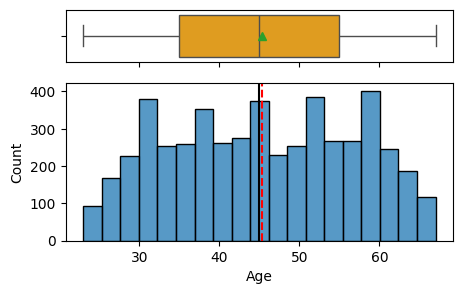

In [ ]:
## Distribution of (#2) Age:
histogram_boxplot(data,"Age",figsize=(5, 3))

#####Observations on (#2) Age Distributions:
* Age in our dataset is evenly distributed.
* Mean is about 45 years old.

#### Observations on (#3) Experience Distributions

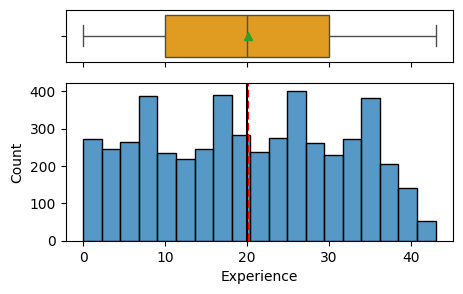

In [ ]:
## Distribution of (#3) Experience:
histogram_boxplot(data,"Experience",figsize=(5,3))

#####Observations on (#3) Experience Distributions:
* Experience in our dataset is evenly distributed.
* Mean is about 20 years.

#### Observations on (#4) Income Distributions

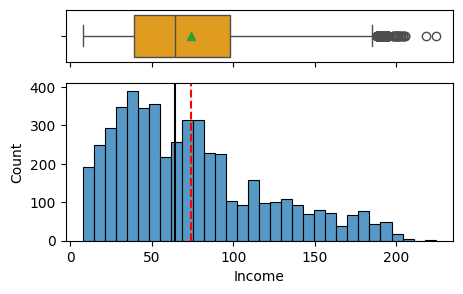

In [ ]:
## Distribution of (#4) Income:
histogram_boxplot(data, "Income",figsize=(5,3))

#####Observations on (#4) Income Distributions:
* Income in our dataset is left leaning distributed.
* Mean is about 74k.
* There's a noticeable number of outiers on the higher end range from 175k to 200k.

#### Observation on (#5) ZIP Code

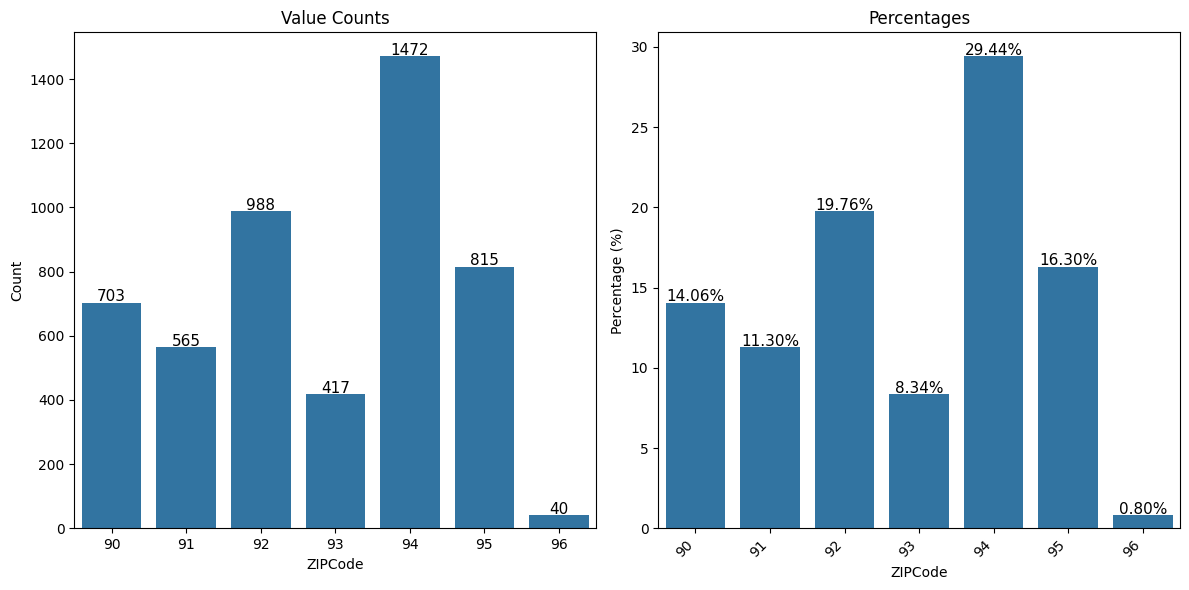

In [ ]:
## Percentage distribution of ZIP_Code's 7 groups:
labeled_barplot(data,"ZIPCode")

##### Observation on (#5) ZIP Code:
* Largest population in the 94.
* Smallest population in the 96.

#### Useful Label Barplot Function:

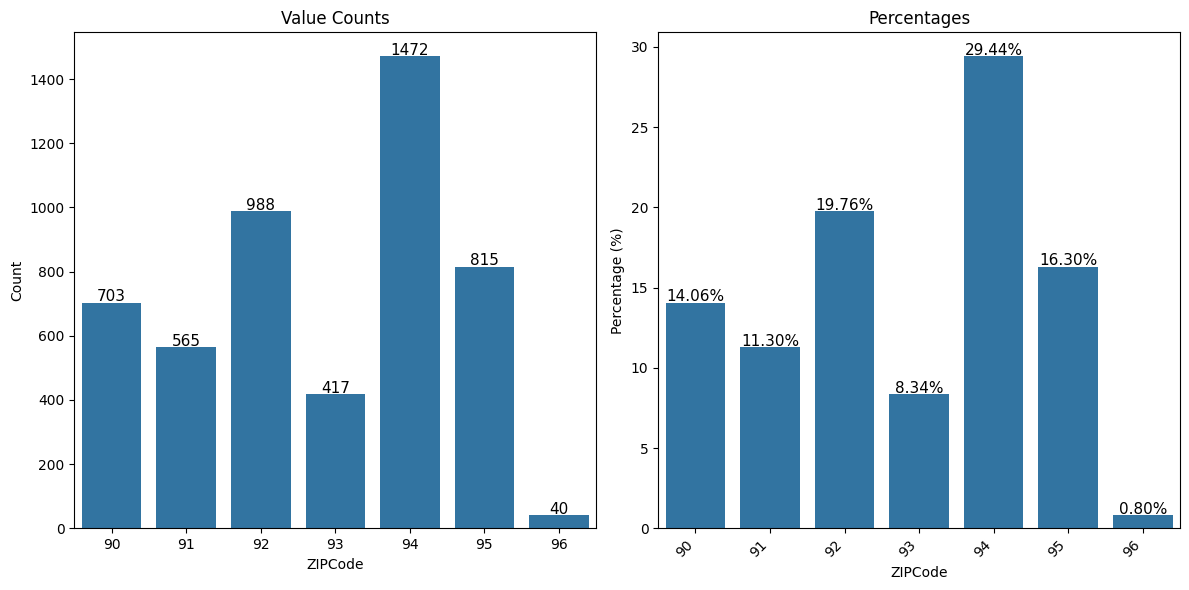

In [ ]:
def labeled_barplot(data, column, perc=True):
    """
    Creates two barplots side-by-side: one showing value counts and
    the other showing percentages for the given column in the DataFrame.

    Args:
        data: The DataFrame containing the data.
        column: The name of the column to plot.
    """

    # Calculate value counts and percentages
    value_counts = data[column].value_counts()
    percentages = data[column].value_counts(normalize=True) * 100

    # Create subplots
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # Plot value counts
    sns.barplot(x=value_counts.index, y=value_counts.values, ax=axes[0])
    axes[0].set_title("Value Counts")
    axes[0].set_xlabel(column)
    axes[0].set_ylabel("Count")

    # Annotate bars with counts
    for p in axes[0].patches:
        axes[0].annotate(f'{int(p.get_height())}',
                         (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha='center', va='baseline',
                         fontsize=11, color='black',
                         xytext=(0, 1),
                         textcoords='offset points')

    # Plot percentages
    sns.barplot(x=percentages.index, y=percentages.values, ax=axes[1])
    axes[1].set_title("Percentages")
    axes[1].set_xlabel(column)
    axes[1].set_ylabel("Percentage (%)")

    # Annotate bars with percentages
    for p in axes[1].patches:
        axes[1].annotate(f'{p.get_height():.2f}%',
                         (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha='center', va='baseline',
                         fontsize=11, color='black',
                         xytext=(0, 1),
                         textcoords='offset points')

    # Rotate x-axis labels if needed
    plt.xticks(rotation=45, ha='right')

    # Adjust layout
    plt.tight_layout()
    plt.show()

# Example usage (assuming 'data' is your DataFrame)
labeled_barplot(data, "ZIPCode")


#### Observations on (#6) Family

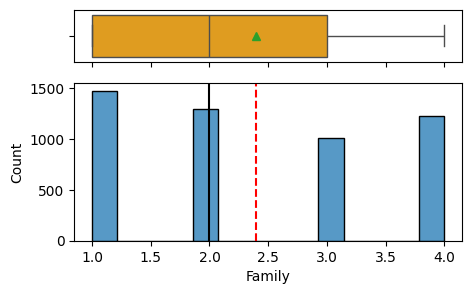

In [ ]:
## Distribution of (#6) Family:
histogram_boxplot(data, "Family",figsize=(5,3))

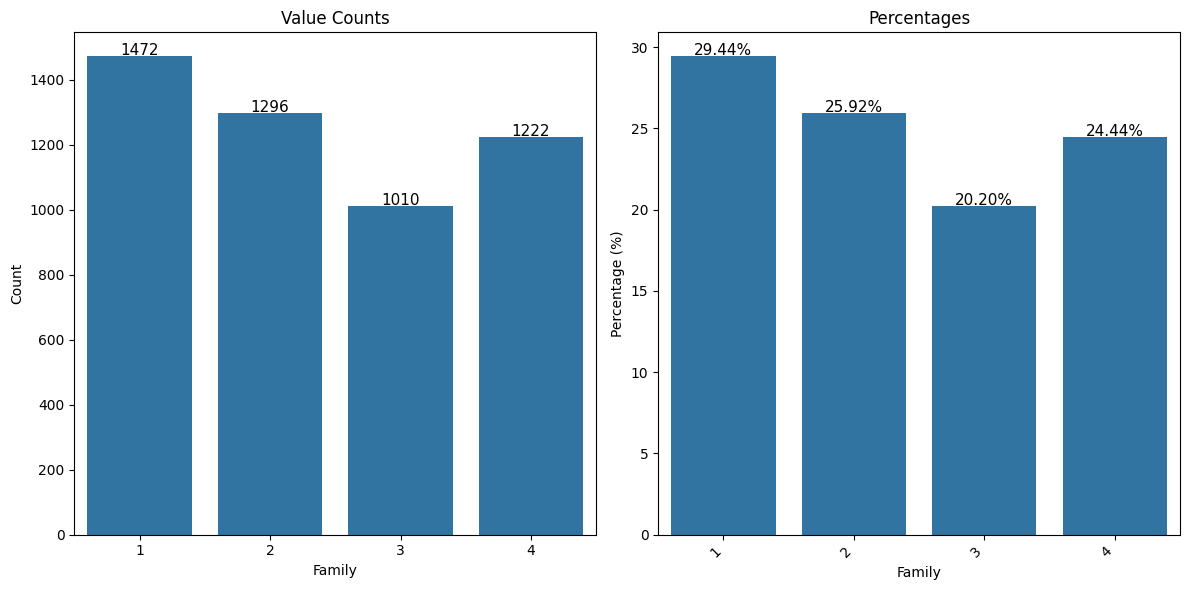

In [ ]:
## Percentage distribution of (#6) Family's 4 values
labeled_barplot(data, "Family", perc=True)

##### Observation on (#6) Family:
* 30% have one child, 26% have two, 20% have three abd 25% have 4.

#### Observations on (#7) CCAvg - Credid Card Average Spending Ditributions:


 Notice the Outliers.


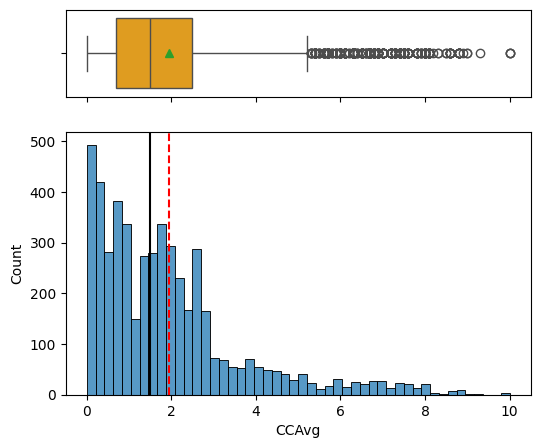

In [ ]:
## Distribution of (#7) CCAvg:
histogram_boxplot(data,"CCAvg",figsize=(6,5))
print("\n Notice the Outliers.")

##### Observation on (#7) CCAvg:
* Mean is around 2k.
* Left leaning distribution under 3k.
* Lots of outliers in the 5k - 10k range.

#### Observations on (#8) Education.

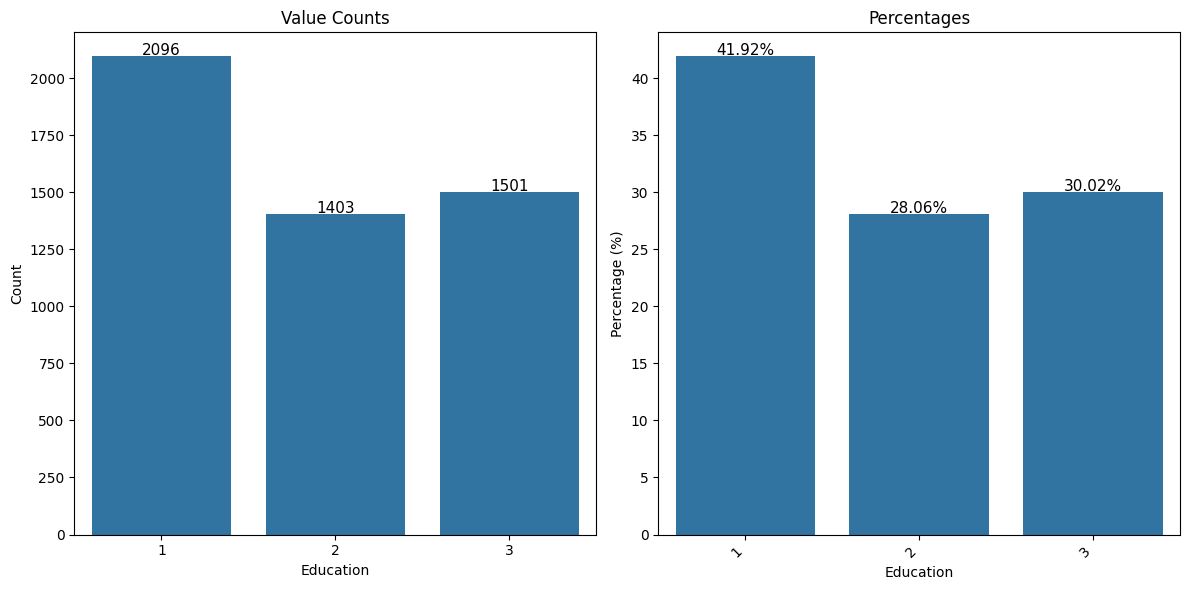

In [ ]:
## Percentage distribution of Education's 3 values
labeled_barplot(data,"Education")

##### Observation on (#8) Education:
* Mean is mostly undergraduate with some graduate.

#### `QUESTION #1: What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?`


#### <font color=green>**Q#1 ANSWER:**</font>
* The median = <font color=red>**56.5k**</font> and more than 75% < <font color=red>**101k**</font>. Outliers seem to  take the morgage loans up to <font color=red>**635k**</font>.

#### Observations on (#9) Mortgage distributions:


 Notice the Outliers:


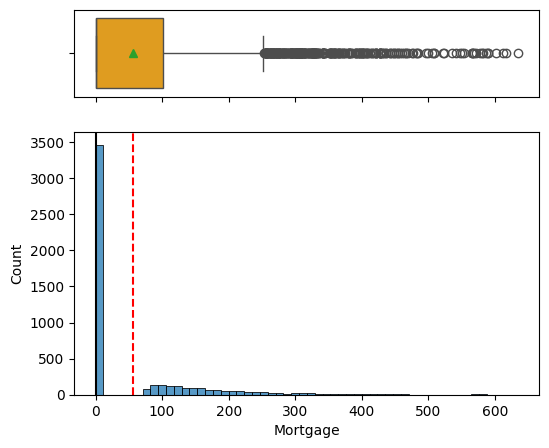

In [ ]:
## Distribution of (#9) Mortgage:
histogram_boxplot(data,"Mortgage",figsize=(6,5))
print("\n Notice the Outliers:")

##### Observation on (#9) Morgage:
* Mean is 56.5k.
* It's heavily left leaning .
* Outliers are in the range of 250k - 650k.

#### Bank Customers That Accepted (#10) Personal Loans - Targeted Audience

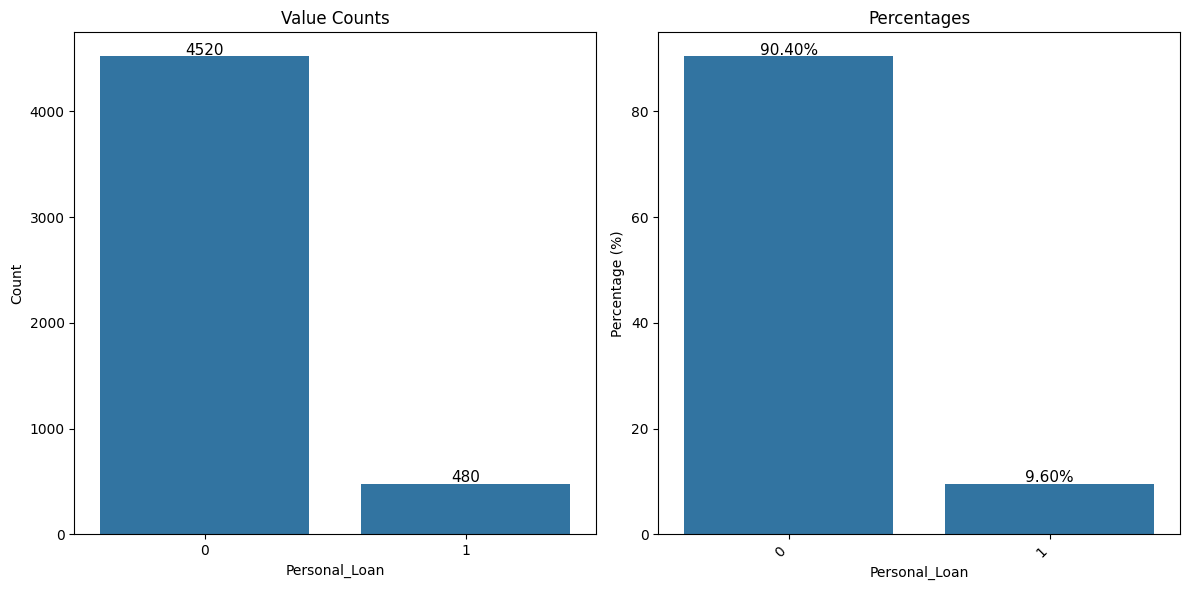

In [ ]:
## Size of Customer Bank Accounts that accepted a (#10) Personal Loan
labeled_barplot(data,"Personal_Loan")

##### Observation on (10) Personal Loans:
* Mean is about 10% represented by 480 customers.

#### Observations on (#11) Securities_Account - How Many Bank Customers have them?

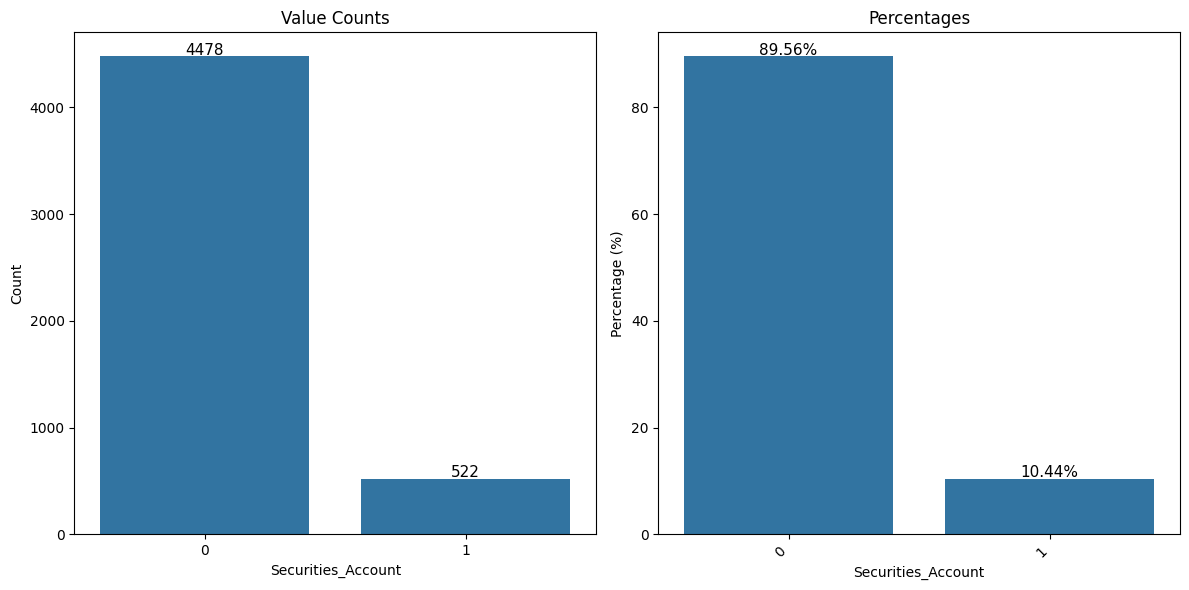

In [ ]:
## Size of Customer Bank Accounts without Securities (0) and with Securities (1).
labeled_barplot(data,"Securities_Account")

##### Observation on (11) Securities Accounts:
* Mean is about 10% represented by 522 customers.
* There are 522 customers with Securities Accounts.
* There are 32 more customers with Securities accounts than those that accepted loans.

#### Observations on (#12) CD_Account bank customers:

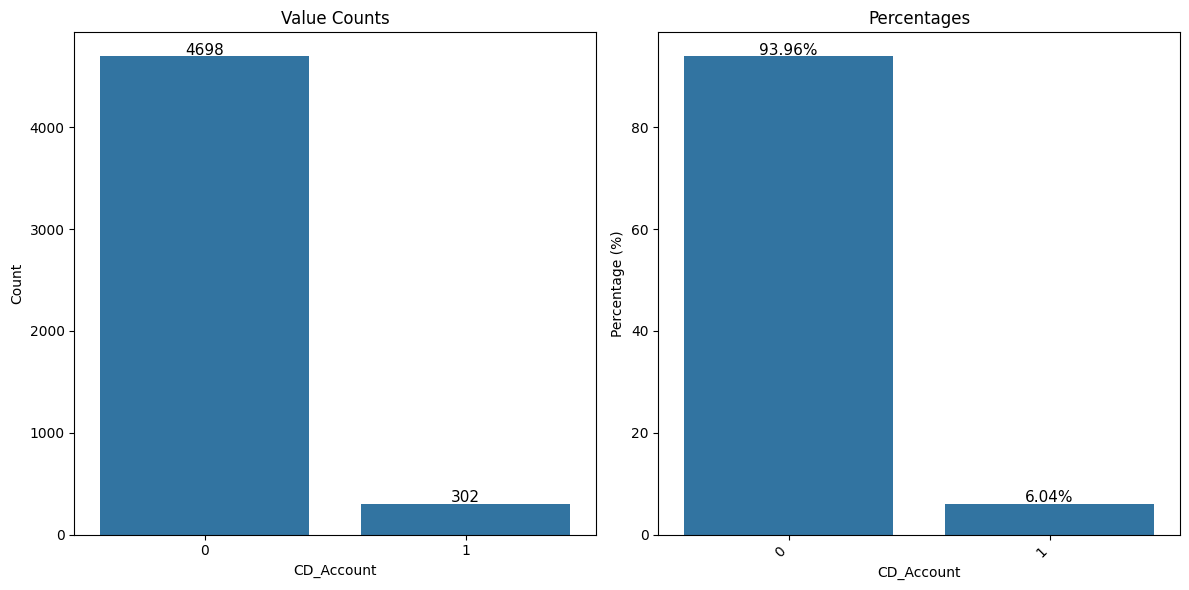

In [ ]:
## Size of Customer Bank Accounts with a CD_Account (1).
labeled_barplot(data,"CD_Account")

##### Observation on (12) CD Accounts:
* Mean is about 6% represented by 302 customers.
* There are fewer customers with CD accounts than the number of customers with Loan acceptances.

#### Observations on (#13) Online banking customers:

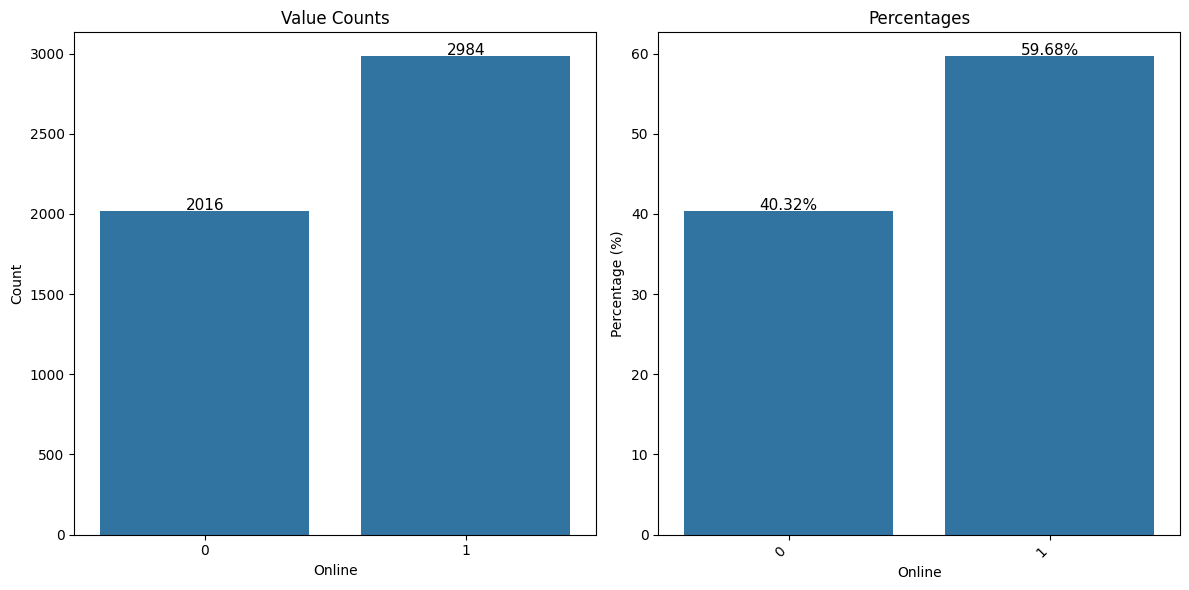

In [ ]:
## Size of Customer Bank Accounts active with online transactions like balance checks (1).
labeled_barplot(data,"Online")

##### Observation on (13) Online Banking:
* Mean is about 60% represented by 2984 customers.

#### `QUESTION #2: How many customers have credit cards?`


#### <font color=green>**Q#2 ANSWER:**</font>
* <font color = red>**1,470** </font>banking customer have credits cards or <font color = red>**29.40%**</font>.

#### Observation on (#14) CreditCard banking customers conducting transactions, even with other banks.

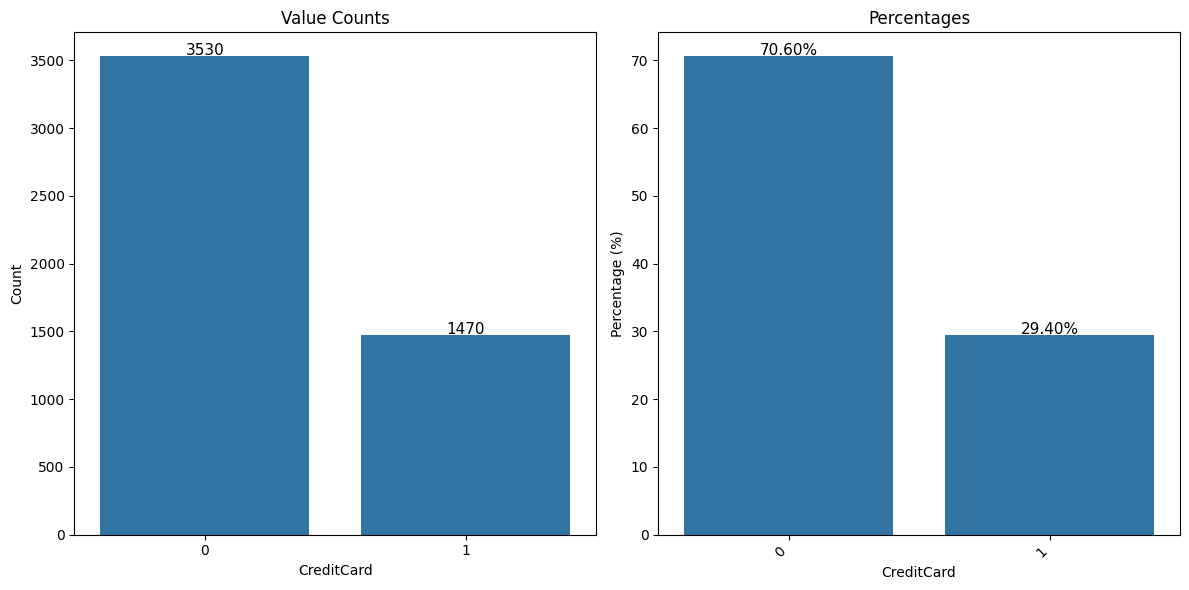

In [ ]:
## Size of Customer Bank Accounts active with Cradit Card transactions, even with other banks (1).
labeled_barplot(data,"CreditCard")

### -> Bivariate Analysis

#### Powerful Function that creates a Stacked Barplot:

In [ ]:
## Powerful Function that creates a stacked barplot

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

#### Powerful Function to plot Distributions wrt Target: (Two plots in one)

In [ ]:
### Powerful function to plot distributions wrt target

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="blue",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="BrBG")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False, # <<--- Powerful
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

#### `QUESTION #3: What are the attributes that have a strong correlation with the target attribute (personal loan)?`

#### <font color=green>**Q#3 ANSWER:**</font>
Per the Correlation Heatmap, the following have the strongest correlation with the target Personal_Loan:
* Income (**0.50**) density.
* CCAvg (**0.37**) density.
* CD_Account (**0.32**) density.

#### Correlation Heatmat - All in one place:

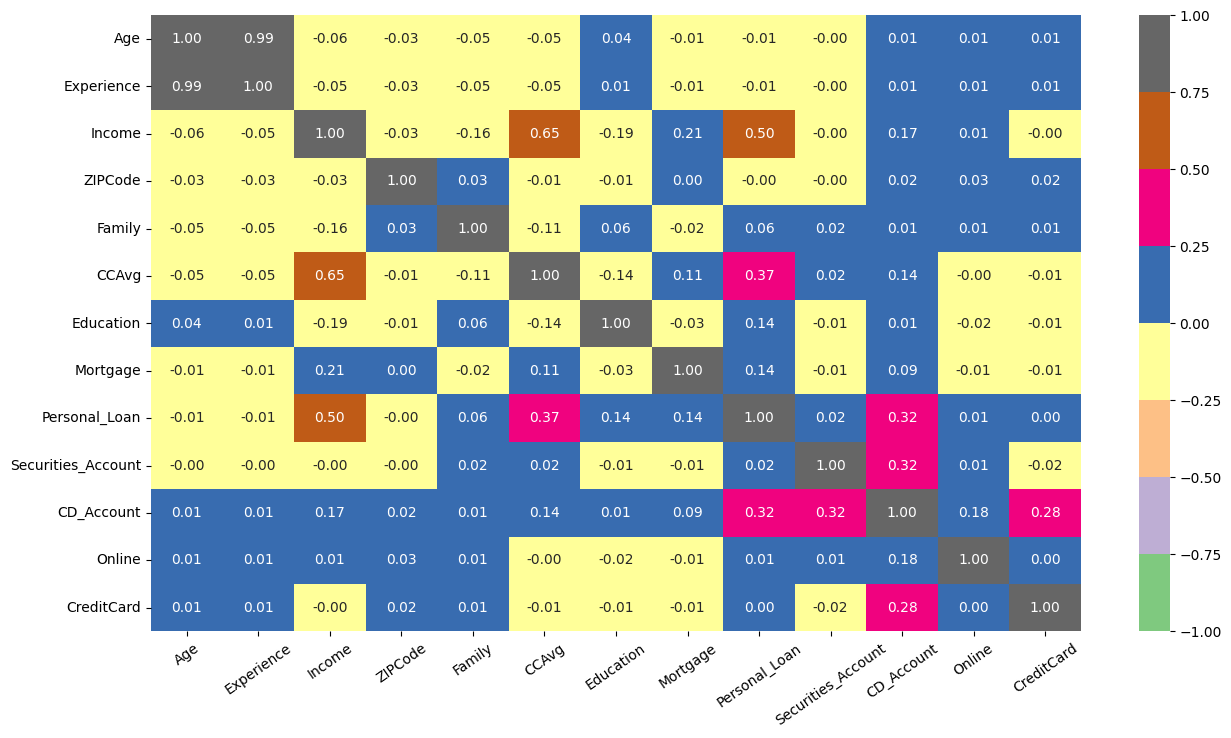

In [ ]:
# I find this heatmap one of the most useful for quick analysis of correlations.
plt.figure(figsize=(15, 8))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Accent")
plt.xticks(rotation=35)
plt.show()

#### `QUESTION #5: How does a customer's interest in purchasing a loan vary with their education?`

#### <font color=green>**Q#5 - ANSWER:**</font>
* The higher the education, the likelyhood a Personal Loan is accepted.
* However, the overall acceptance averages <font color=red>**9.6%**</font>.
* These categories can be targeted for higher conversion.

#### Customer's interest in purchasing a loan varies with their education.

Personal_Loan     0    1   All
Education                     
All            4520  480  5000
3              1296  205  1501
2              1221  182  1403
1              2003   93  2096
------------------------------------------------------------------------------------------------------------------------


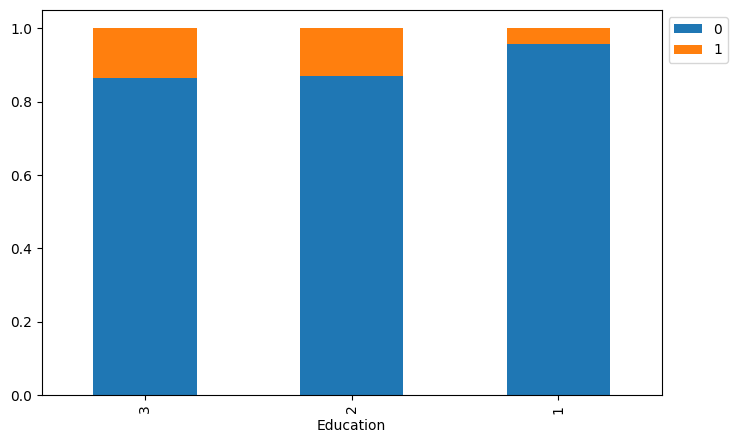

In [ ]:
## Education categories: (1) - Undergrad.    (2) - Graduate.   (3) - Advanced/Professional
##  Personal Loan Accepted (1) and Not Acepted (0).
stacked_barplot(data, "Education", "Personal_Loan")

Personal_Loan     0    1   All
Education                     
1              2003   93  2096
2              1221  182  1403
3              1296  205  1501
All            4520  480  5000

Percentages:
Personal_Loan      0      1    All
Education                         
1              95.56   4.44  100.0
2              87.03  12.97  100.0
3              86.34  13.66  100.0
All            90.40   9.60  100.0


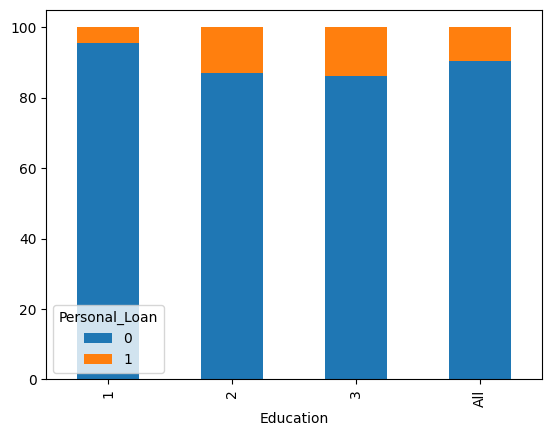

In [ ]:
## Define function to plot and reuse:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts, plot a stacked bar chart,
    and return a DataFrame with percentages.

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    # Calculate cross-tabulation and overall counts
    cross_tab = pd.crosstab(data[predictor], data[target], margins=True)

    # Calculate percentages and round to 2 decimal places
    percentage_df = cross_tab.div(cross_tab['All'], axis=0).mul(100).round(2)

    # Print cross-tabulation and percentages
    print(cross_tab)
    print("\nPercentages:")
    print(percentage_df)

    # Plotting (optional)
    percentage_df.drop('All', axis=1).plot(kind='bar', stacked=True)
    plt.show()

    return percentage_df

# Call the function
percentage_df = stacked_barplot(data, "Education", "Personal_Loan")

#### Personal_Loan vs Family

Family            1     2     3     4   All
Personal_Loan                              
0              1365  1190   877  1088  4520
1               107   106   133   134   480
All            1472  1296  1010  1222  5000

Percentages:
Family             1      2      3      4    All
Personal_Loan                                   
0              30.20  26.33  19.40  24.07  100.0
1              22.29  22.08  27.71  27.92  100.0
All            29.44  25.92  20.20  24.44  100.0


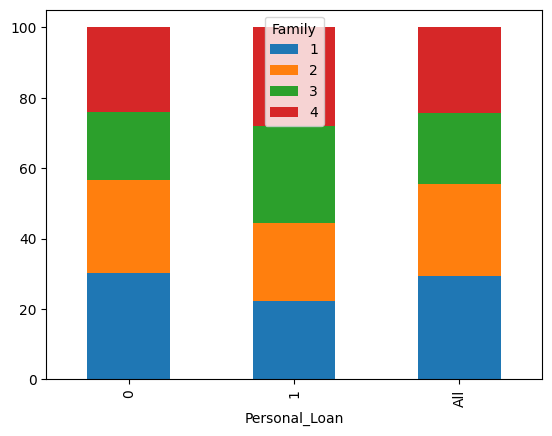

Family,1,2,3,4,All
Personal_Loan,,,,,
0,30.20,26.33,19.40,24.07,100.0
1,22.29,22.08,27.71,27.92,100.0
All,29.44,25.92,20.20,24.44,100.0


In [ ]:
## Stacked barplot for Personal Loan and Family:
stacked_barplot(data, "Personal_Loan","Family")

#### Loan Acceptance vs Family Size
* Personal Loan acceptance is higher with families with 1-2 children.
* Personal Loan acceptance is slightly lower with families with 3-4 children.

#### Personal_Loan vs Securities_Account

Securities_Account     0    1   All
Personal_Loan                      
0                   4058  462  4520
1                    420   60   480
All                 4478  522  5000

Percentages:
Securities_Account      0      1    All
Personal_Loan                          
0                   89.78  10.22  100.0
1                   87.50  12.50  100.0
All                 89.56  10.44  100.0


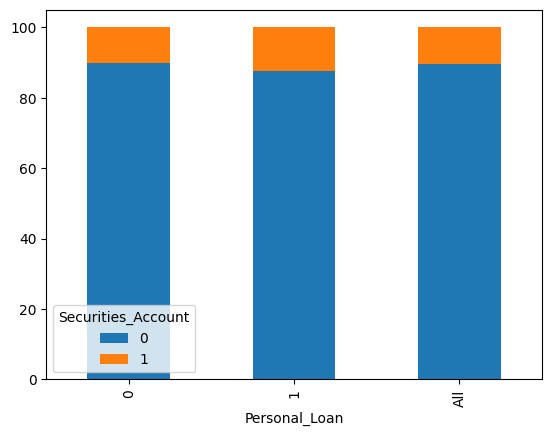

Securities_Account,0,1,All
Personal_Loan,,,
0,89.78,10.22,100.0
1,87.50,12.50,100.0
All,89.56,10.44,100.0


In [ ]:
## Stacked barplot for Personal Loan and Securities_Account:
stacked_barplot(data,"Personal_Loan","Securities_Account")

#### Personal_Loan vs CD_Account

CD_Account        0    1   All
Personal_Loan                 
0              4358  162  4520
1               340  140   480
All            4698  302  5000

Percentages:
CD_Account         0      1    All
Personal_Loan                     
0              96.42   3.58  100.0
1              70.83  29.17  100.0
All            93.96   6.04  100.0


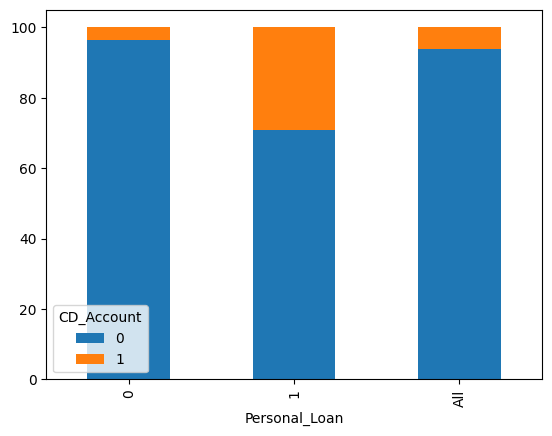

CD_Account,0,1,All
Personal_Loan,,,
0,96.42,3.58,100.0
1,70.83,29.17,100.0
All,93.96,6.04,100.0


In [ ]:
## Stacked barplot for Personal Loan and CD_Accounts:
stacked_barplot(data,"Personal_Loan","CD_Account")

#### Personal_Loan vs Online

Online            0     1   All
Personal_Loan                  
0              1827  2693  4520
1               189   291   480
All            2016  2984  5000

Percentages:
Online             0      1    All
Personal_Loan                     
0              40.42  59.58  100.0
1              39.38  60.62  100.0
All            40.32  59.68  100.0


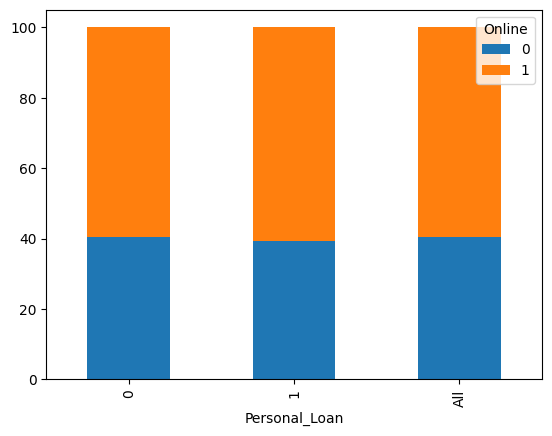

Online,0,1,All
Personal_Loan,,,
0,40.42,59.58,100.0
1,39.38,60.62,100.0
All,40.32,59.68,100.0


In [ ]:
## Stacked barplot for Personal Loan and Online:
stacked_barplot(data,"Personal_Loan","Online")

#### Personal_Loan vs CreditCard

CreditCard        0     1   All
Personal_Loan                  
0              3193  1327  4520
1               337   143   480
All            3530  1470  5000

Percentages:
CreditCard         0      1    All
Personal_Loan                     
0              70.64  29.36  100.0
1              70.21  29.79  100.0
All            70.60  29.40  100.0


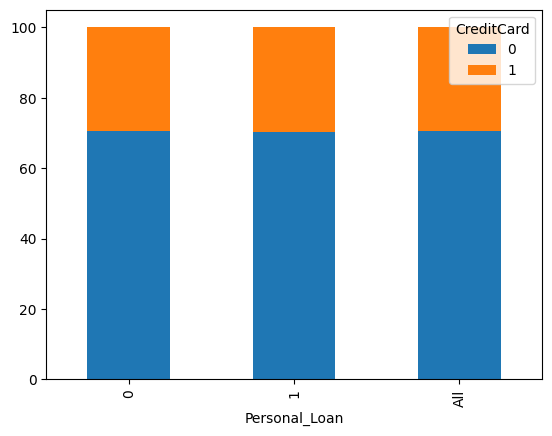

CreditCard,0,1,All
Personal_Loan,,,
0,70.64,29.36,100.0
1,70.21,29.79,100.0
All,70.60,29.40,100.0


In [ ]:
## Stacked barplot for Personal Loan and CreditCard:
stacked_barplot(data,"Personal_Loan","CreditCard")

#### Personal_Loan vs ZIPCode

ZIPCode         90   91   92   93    94   95  96   All
Personal_Loan                                         
0              636  510  894  374  1334  735  37  4520
1               67   55   94   43   138   80   3   480
All            703  565  988  417  1472  815  40  5000

Percentages:
ZIPCode           90     91     92    93     94     95    96    All
Personal_Loan                                                      
0              14.07  11.28  19.78  8.27  29.51  16.26  0.82  100.0
1              13.96  11.46  19.58  8.96  28.75  16.67  0.62  100.0
All            14.06  11.30  19.76  8.34  29.44  16.30  0.80  100.0


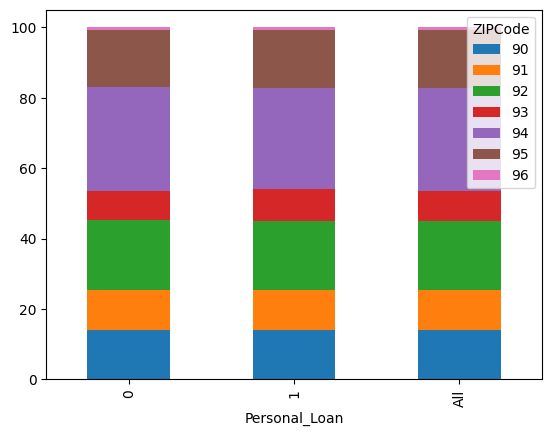

ZIPCode,90,91,92,93,94,95,96,All
Personal_Loan,,,,,,,,
0,14.07,11.28,19.78,8.27,29.51,16.26,0.82,100.0
1,13.96,11.46,19.58,8.96,28.75,16.67,0.62,100.0
All,14.06,11.30,19.76,8.34,29.44,16.30,0.80,100.0


In [ ]:
## Stacked barplot for Personal Loan and ZIPCode:
stacked_barplot(data,"Personal_Loan", "ZIPCode")

#### `QUESTION #4 How does a customer's interest in purchasing a loan vary with their age?`

#### <font color=green>**Q#4 - ANSWER:**</font>

* 45 years of age seem to be a sweet spot where the interest is about the same for older as it is for younger bank customers.
* Outliers were present in almost all age bands.
* Once outliers were treated, 38-42 showed the lowest acceptance. But Why? This requires further investigations.
* 32-38 and 43-46 year olds had about a similar density acceptance rate.

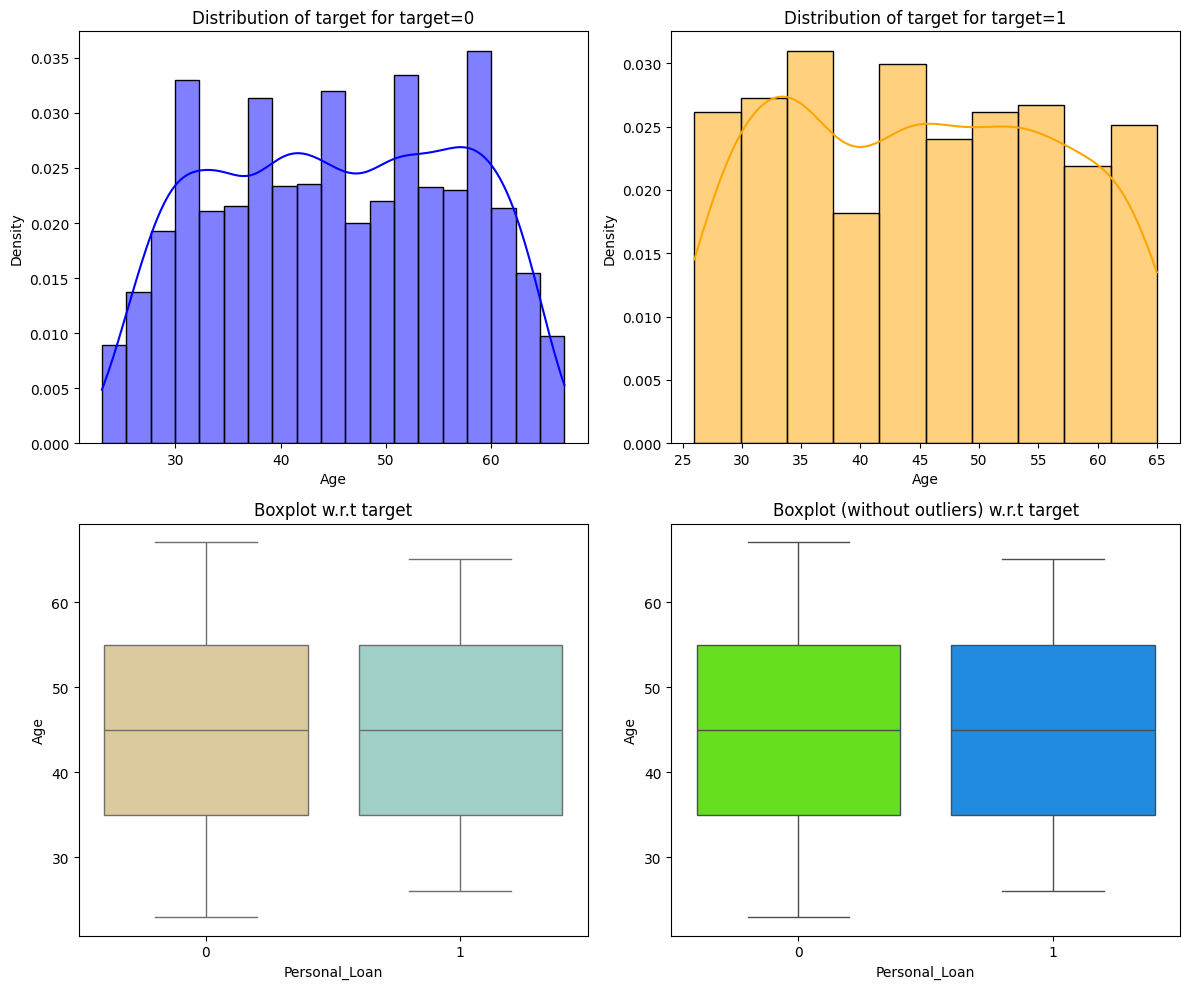

In [ ]:
## Distributions for Personal Loan (Loan = 1) or (No Loan = 0) and Age:
distribution_plot_wrt_target(data, "Age", "Personal_Loan")

#### Age and Personal Loan acceptance
* Has an even distribution with a mean at 45 years even after outliers have been treated.

#### Personal Loan vs Experience

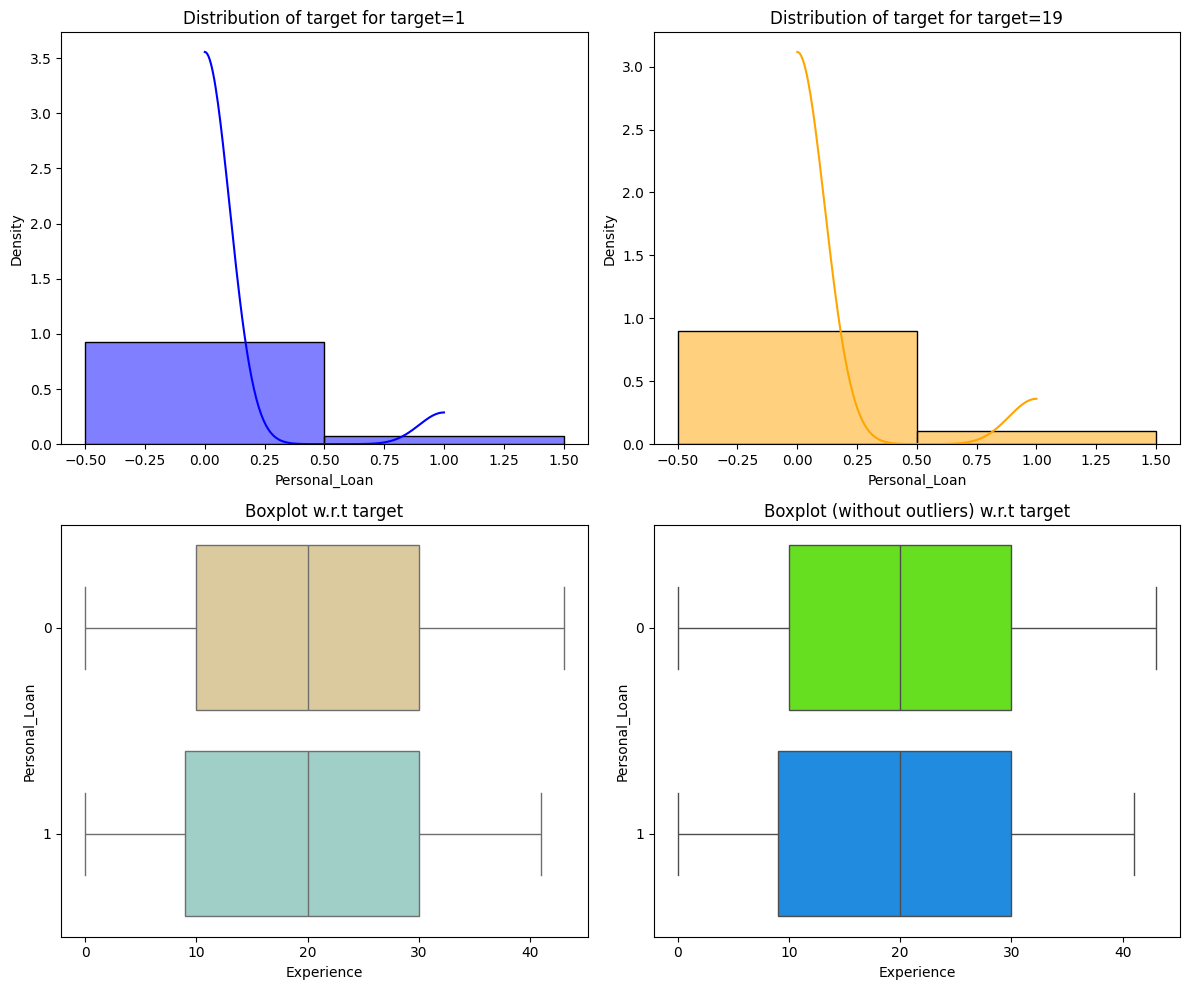

In [ ]:
## Distributions for Personal Loan and Experience:
distribution_plot_wrt_target(data,"Personal_Loan","Experience")

#### Experience and Personal Loan acceptance
* Has an even distribution even after outliers have been treated with a mean at 20 years of experience.

#### Personal Loan vs Income

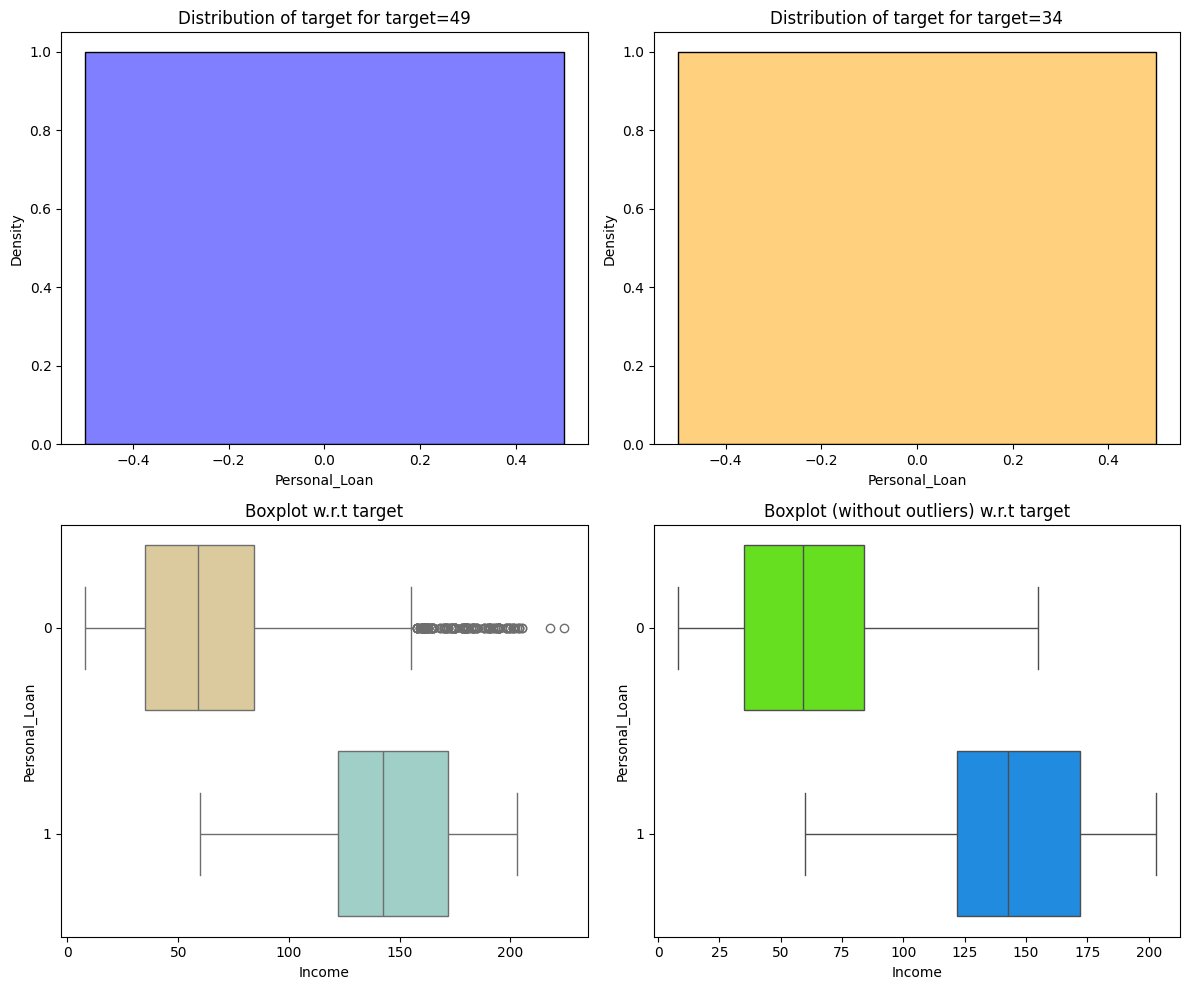

In [ ]:
## Distributions for Personal Loan and Income:
distribution_plot_wrt_target(data,"Personal_Loan","Income")

#### Income and Personal Loan acceptance
* Has an even distribution with a mean of 148k income even after outliers have been treated.

#### Personal Loan vs CCAvg

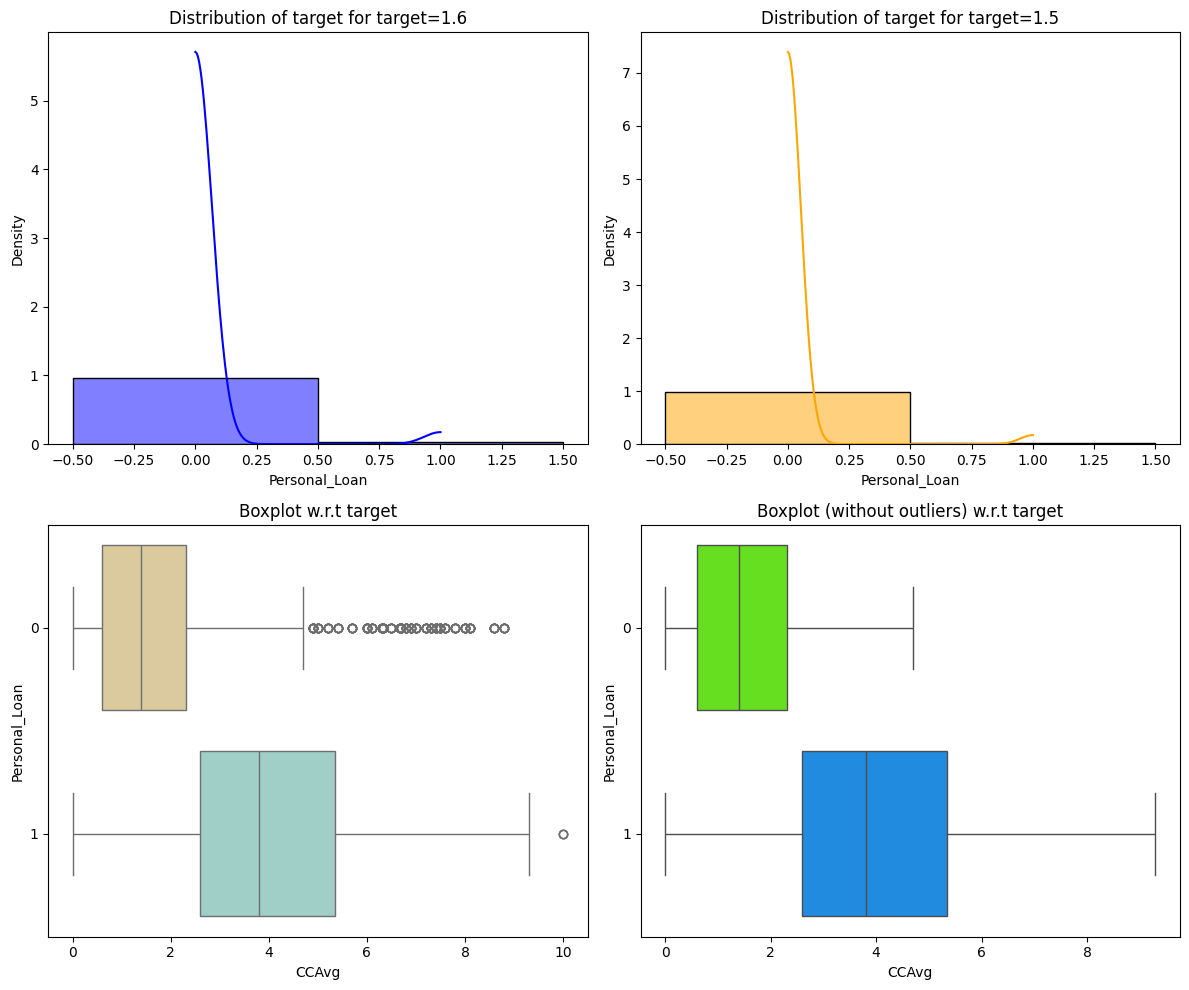

In [ ]:
## Distributions for Personal Loan and CCAvg
distribution_plot_wrt_target(data,"Personal_Loan","CCAvg")

#### CCAvg and Personal Loan acceptance
* Those that accepted a Personal Loan had a higher credit card average than those that didn't.
* Has the same distribution even before and after outliers have been treated.

## Data Preprocessing (contd.)

### Outlier Detection

In [ ]:
# Select only numeric columns before calculating quantiles
numeric_data = data.select_dtypes(include='number')

# Calculate the IQR for each numeric column
Q1 = numeric_data.quantile(0.25)  # To find the 25th percentile and 75th percentile.
Q3 = numeric_data.quantile(0.75)

IQR = Q3 - Q1  # Inter Quantile Range (75th perentile - 25th percentile)

lower = (
    Q1 - 1.5 * IQR
)  # Finding lower and upper bounds for all values. All values outside these bounds are outliers
upper = Q3 + 1.5 * IQR

In [ ]:
## Import to run independently (remove after troubleshooting)
import pandas as pd

# Assuming 'data' is your DataFrame

# Identify non-numeric columns even after conversion
non_numeric_cols = data.select_dtypes(exclude=['number']).columns
print("Non-numeric columns:", non_numeric_cols)  # Print these columns for inspection

# Option 1: Drop non-numeric columns
data_numeric = data.drop(non_numeric_cols, axis=1)  # Create a new DataFrame with only numeric columns

# Option 2: Handle non-numeric values (replace, impute, etc.)
# ... (Add code here to handle non-numeric values in specific columns as needed)

Q1 = data_numeric.quantile(0.25)  # To find the 25th percentile and 75th percentile.
Q3 = data_numeric.quantile(0.75)

IQR = Q3 - Q1  # Inter Quantile Range (75th perentile - 25th percentile)

lower = (
    Q1 - 1.5 * IQR
)  # Finding lower and upper bounds for all values. All values outside these bounds are outliers
upper = Q3 + 1.5 * IQR

Non-numeric columns: Index(['ZIPCode', 'Education', 'Personal_Loan', 'Securities_Account',
       'CD_Account', 'Online', 'CreditCard'],
      dtype='object')


In [ ]:
## Summary: This code calculates the percentage of numeric values in the DataFrame
## data that fall outside the range defined by the variables lower and upper.
## It's a common way to QUANTIFY the presence of outliers in a dataset.

## In detail:
'''
1. data.select_dtypes(include=["float64", "int64"]):
This part selects only the columns in the DataFrame data that have numeric data types
(float64 and int64). It filters out any columns containing strings, dates, or other non-numeric types.

2. (data.select_dtypes(include=["float64", "int64"]) < lower):
This compares each value in the selected numeric columns with the value stored in the variable lower.
It creates a DataFrame of the same shape, where each cell is either True (if the corresponding value
in data is less than lower) or False (otherwise).

3. (data.select_dtypes(include=["float64", "int64"]) > upper):
Similar to the previous step, this compares each value in the selected numeric columns with the value
stored in the variable upper. It creates another DataFrame of boolean values (True/False) indicating
whether each value is greater than upper.

4. | (Bitwise OR):
This operator combines the two boolean DataFrames created in steps 2 and 3. It performs a bitwise
OR operation on each corresponding pair of cells. The result is a new DataFrame where a cell is True
if the corresponding value in data is either less than lower or greater than upper.

5. .sum():
This sums up all the True values in the resulting boolean DataFrame. Essentially, it counts how many
numeric values in the original DataFrame fall outside the range defined by lower and upper.

6. / len(data):
This divides the count of outlier values by the total number of rows in the DataFrame data.
It gives you the proportion of outlier values.

7. * 100:
This multiplies the proportion by 100 to express it as a percentage.

Straight forward, right?
'''
(
    (data.select_dtypes(include=["float64", "int64"]) < lower)
    | (data.select_dtypes(include=["float64", "int64"]) > upper)
).sum() / len(data) * 100

,0
Age,0.00
Experience,0.00
Income,1.92
Family,0.00
CCAvg,6.48
Mortgage,5.82


### Data Preparation for Modeling

In [ ]:
## dropping Experience as it is perfectly correlated with Age
X = data.drop(["Personal_Loan", "Experience"], axis=1)
Y = data["Personal_Loan"]

X = pd.get_dummies(X, columns=["ZIPCode", "Education"], drop_first=True)
## --- (This is where the training/testing fun starts. ---
## Splitting data in train and test sets:
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

In [ ]:
## Display the percentage breakedown of the training and testing data:
print("Shape of TRAINING set : ", X_train.shape)
print("Shape of TEST set : ", X_test.shape)
print("-----------------------------------")
print("\n----------> Percentage of classes in TRAINING set:")
print("\t",y_train.value_counts(normalize=True))
print("\n----------> Percentage of classes in TEST set:")
print("\t",y_test.value_counts(normalize=True))

Shape of TRAINING set :  (3500, 17)
Shape of TEST set :  (1500, 17)
-----------------------------------

----------> Percentage of classes in TRAINING set:
	 Personal_Loan
0    0.905429
1    0.094571
Name: proportion, dtype: float64

----------> Percentage of classes in TEST set:
	 Personal_Loan
0    0.900667
1    0.099333
Name: proportion, dtype: float64


In [ ]:
## Intended to improve readability:
print("Shape of TRAINING set : ", X_train.shape)
print("Shape of TEST set : ", X_test.shape)
print("-----------------------------------")

print("\n----------> Percentage of classes in TRAINING set:")
for index, value in y_train.value_counts(normalize=True).items():
    print(f"\t{index}    {value:.2f}")  # Indent each line with \t

print("\n----------> Percentage of classes in TEST set:")
for index, value in y_test.value_counts(normalize=True).items():
    print(f"\t{index}    {value:.2f}")  # Indent each line with \t

Shape of TRAINING set :  (3500, 17)
Shape of TEST set :  (1500, 17)
-----------------------------------

----------> Percentage of classes in TRAINING set:
	0    0.91
	1    0.09

----------> Percentage of classes in TEST set:
	0    0.90
	1    0.10


## <font color=magenta> Model Building </font>

### Model Evaluation Criterion

### Model Building

Functions to calculate different metrics and confusion matrix to reuse their code repeatedly with each model:

1. The <font color= magenta>**`model_performance_classification_sklearn`**</font> function will be used to check the model performance of models.
2. The <font color= magenta>**`confusion_matrix_sklearn`**</font> function will be used to plot confusion matrix.

In [ ]:
## Function to compute different metrics to check Performance of a CLASSIFICATION model built using sklearn:
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables (Income, CCAvg, CD, Account)
    target: dependent variable (Personal Loan)
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # Accuracy: (TP + TN) / (TP + TN + FP + FN) - Overall correctness
    recall = recall_score(target, pred) # Recall (Sensitivity): TP / (TP + FN) - Ability to find all positive instances
    precision = precision_score(target, pred)  # Precision: TP / (TP + FP) - Proportion of true positives among predicted positives
    f1 = f1_score(target, pred)  # F1-score: 2 * (Precision * Recall) / (Precision + Recall) - Harmonic mean of precision and recall

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

    '''Where:

TP (True Positives): Correctly predicted positive instances.
TN (True Negatives): Correctly predicted negative instances.
FP (False Positives): Incorrectly predicted as positive (Type I error).
FN (False Negatives): Incorrectly predicted as negative (Type II error).

Key Points:

Accuracy: A good overall metric, but can be misleading if the dataset is imbalanced (one class is much more
frequent than others).

Recall: Important when the cost of missing a positive instance is high (e.g., medical diagnosis).

Precision: Important when the cost of a false positive is high (e.g., spam detection).

F1-score: Provides a balanced assessment when both precision and recall are important.
    '''

In [ ]:
## OPTION 1 CONFUSION MATRIX
## Function to reuse:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2) # Reshape

    plt.figure(figsize=(4, 2))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [ ]:
## OPTION 2 CONFUSION MATRIX
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def confusion_matrix_sklearn(model, predictors, target):
    """
    Plots the confusion matrix with percentages.

    Args:
        model: The trained classifier model.
        predictors: The independent variables (features).
        target: The dependent variable (true labels).
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)

    # Provide the actual class labels here
    labels = np.asarray(['Class 0', 'Class 1'])

    # Create a heatmap for the confusion matrix
    plt.figure(figsize=(4, 2))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')

    # Display the plot
    plt.show()

In [ ]:
## OPTION 3
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(4, 2))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

#### Build Decision Tree Model

In [ ]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier

# Convert X_train and y_train to NumPy arrays if they are lists
X_train = np.array(X_train)
y_train = np.array(y_train)

# Example: Reshape X_train if it is a 1D array
if len(X_train.shape) == 1:
    X_train = X_train.reshape(-1, 1)

# Flatten y_train if necessary
y_train = y_train.ravel()

# Fit the model
model = DecisionTreeClassifier(criterion="gini", random_state=1)
model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=1)

In [ ]:
## This is the DECISION TREE model:
model = DecisionTreeClassifier(criterion="gini", random_state=1)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

#### Checking model performance on TRAINING data


#### Predicted results (x Axis) vs Actual Results (y Axis).

* <font color=red>**3169**</font> Top Left (***TN - True Negatives***): The model correctly predicted these instances as negative.
* <font color=red>**0** </font>Top Right (***FP - False Positives***): The model incorrectly predictS the instances as positive when they were actually negative (Type I error).
* <font color=red>**0** </font> Bottom Left (***FN - False Negatives***): The model incorrectly predictS the instances as negative when they were actually positive (Type II error).
* <font color=red>**331** </font> ***Bottom Right (TP - True Positives***): The model correctly predicted the instances as positive.

'\nPredicted labels on the horizontal axis (columns)\nTrue labels on the vertical axis (rows)\nThe quadrants are arranged as follows:\n\nPredicted\n             Neg   Pos\nTrue   Neg | TN   FP |\n       Pos | FN   TP |\n\n'

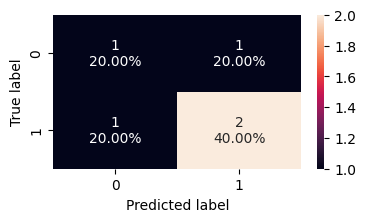

In [ ]:
## Display the matrix:
confusion_matrix_sklearn(model, X_train, y_train)
'''
Predicted labels on the horizontal axis (columns)
True labels on the vertical axis (rows)
The quadrants are arranged as follows:

Predicted
             Neg   Pos
True   Neg | TN   FP |
       Pos | FN   TP |

'''
## Explanation:
##
## Top Left (TN - True Negatives): The model correctly predicted the instances as negative.
## Top Right (FP - False Positives): The model incorrectly predicted the instances as positive when they were actually negative (Type I error).
## Bottom Left (FN - False Negatives): The model incorrectly predicted the instances as negative when they were actually positive (Type II error).
## Bottom Right (TP - True Positives): The model correctly predicted the instances as positive.

#### Checking model performance on TEST data

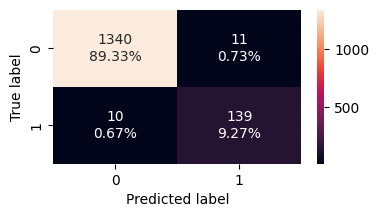

In [ ]:
confusion_matrix_sklearn(model, X_test, y_test) ## Repeat after model optmization and compare

In [ ]:
## Predictors Accuracy:

'''
acc = accuracy_score(target, pred)
# Accuracy: (TP + TN) / (TP + TN + FP + FN) - Overall correctness

recall = recall_score(target, pred)
# Recall (Sensitivity): TP / (TP + FN) - Ability to find all positive instances

precision = precision_score(target, pred)
# Precision: TP / (TP + FP) - Proportion of true positives among predicted positives

f1 = f1_score(target, pred)
# F1-score: 2 * (Precision * Recall) / (Precision + Recall) - Harmonic mean of precision and recall

'''


decision_tree_perf_train = model_performance_classification_sklearn(
    model, X_train, y_train
)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,0.6,0.666667,0.666667,0.666667


TEST data Accuracy of predictions.

In [ ]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier

# Check if X_test is a list and convert it to a NumPy array if needed
X_test = np.array(X_test)

# Verify the shape of X_test
print("Shape of X_test:", X_test.shape)

# Ensure X_test has the same number of features as X_train
if X_test.shape[1] != 14:  # Assuming the model was trained with 17 features
    raise ValueError("X_test does not have the expected number of features.")

# Evaluate model performance on test data
decision_tree_perf_test = model_performance_classification_sklearn(
    model, X_test, y_test
)
print(decision_tree_perf_test)


Shape of X_test: (1500, 17)


ValueError: X_test does not have the expected number of features.

In [ ]:
## Predictors Accuracy: (Test data)
decision_tree_perf_train = model_performance_classification_sklearn(
    model, X_test, y_test
)
decision_tree_perf_train

ValueError: X has 17 features, but DecisionTreeClassifier is expecting 1 features as input.

### Model Evaluation Metrics - Results

All  evaluation metrics (accuracy, recall, and precision) are equal to 1.0, it indicates a perfect model performance on the dataset used for evaluation.

Here's what it means in detail:

* Accuracy = 1.0: Your model made no errors. Every single instance (both positive and negative) was predicted correctly.
* Recall = 1.0: Your model correctly identified all positive instances. There were no false negatives (instances incorrectly predicted as negative).
* Precision = 1.0: All instances predicted as positive were actually positive. There were no false positives (instances incorrectly predicted as positive).
* F1-score = 1.0: This signifies a perfect balance between precision and recall. It means your model not only correctly identifies all positive instances (recall = 1.0) but also ensures that all instances predicted as positive are truly positive (precision = 1.0).

Possible Scenarios:

*While result at 1.0 are ideal, it's important to consider a few things:*

1. Overfitting: If you achieved these results on the training set, it's crucial to evaluate the model on a separate test set to ensure it's not simply memorizing the training data and can generalize to new, unseen data.
2. Data Leakage: Double-check that there's no data leakage, where information from the test set might have inadvertently leaked into the training process, artificially inflating performance.
3. Simple Problem/Dataset: It's possible you're dealing with a relatively simple problem or a dataset where the classes are easily separable.
Recommendations:
4. Evaluate on a Test Set: Always validate your model on a separate test set that it hasn't seen during training.

Consider Real-World Implications: Even with perfect metrics, consider how the model will perform in a real-world scenario where data might be noisier or less predictable.

#### Visualizing the Decision Tree During Training

In [ ]:
# Dependent variables
feature_names = list(X_train.columns)
print(feature_names)

['Age', 'Income', 'Family', 'CCAvg', 'Mortgage', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard', 'ZIPCode_91', 'ZIPCode_92', 'ZIPCode_93', 'ZIPCode_94', 'ZIPCode_95', 'ZIPCode_96', 'Education_2', 'Education_3']


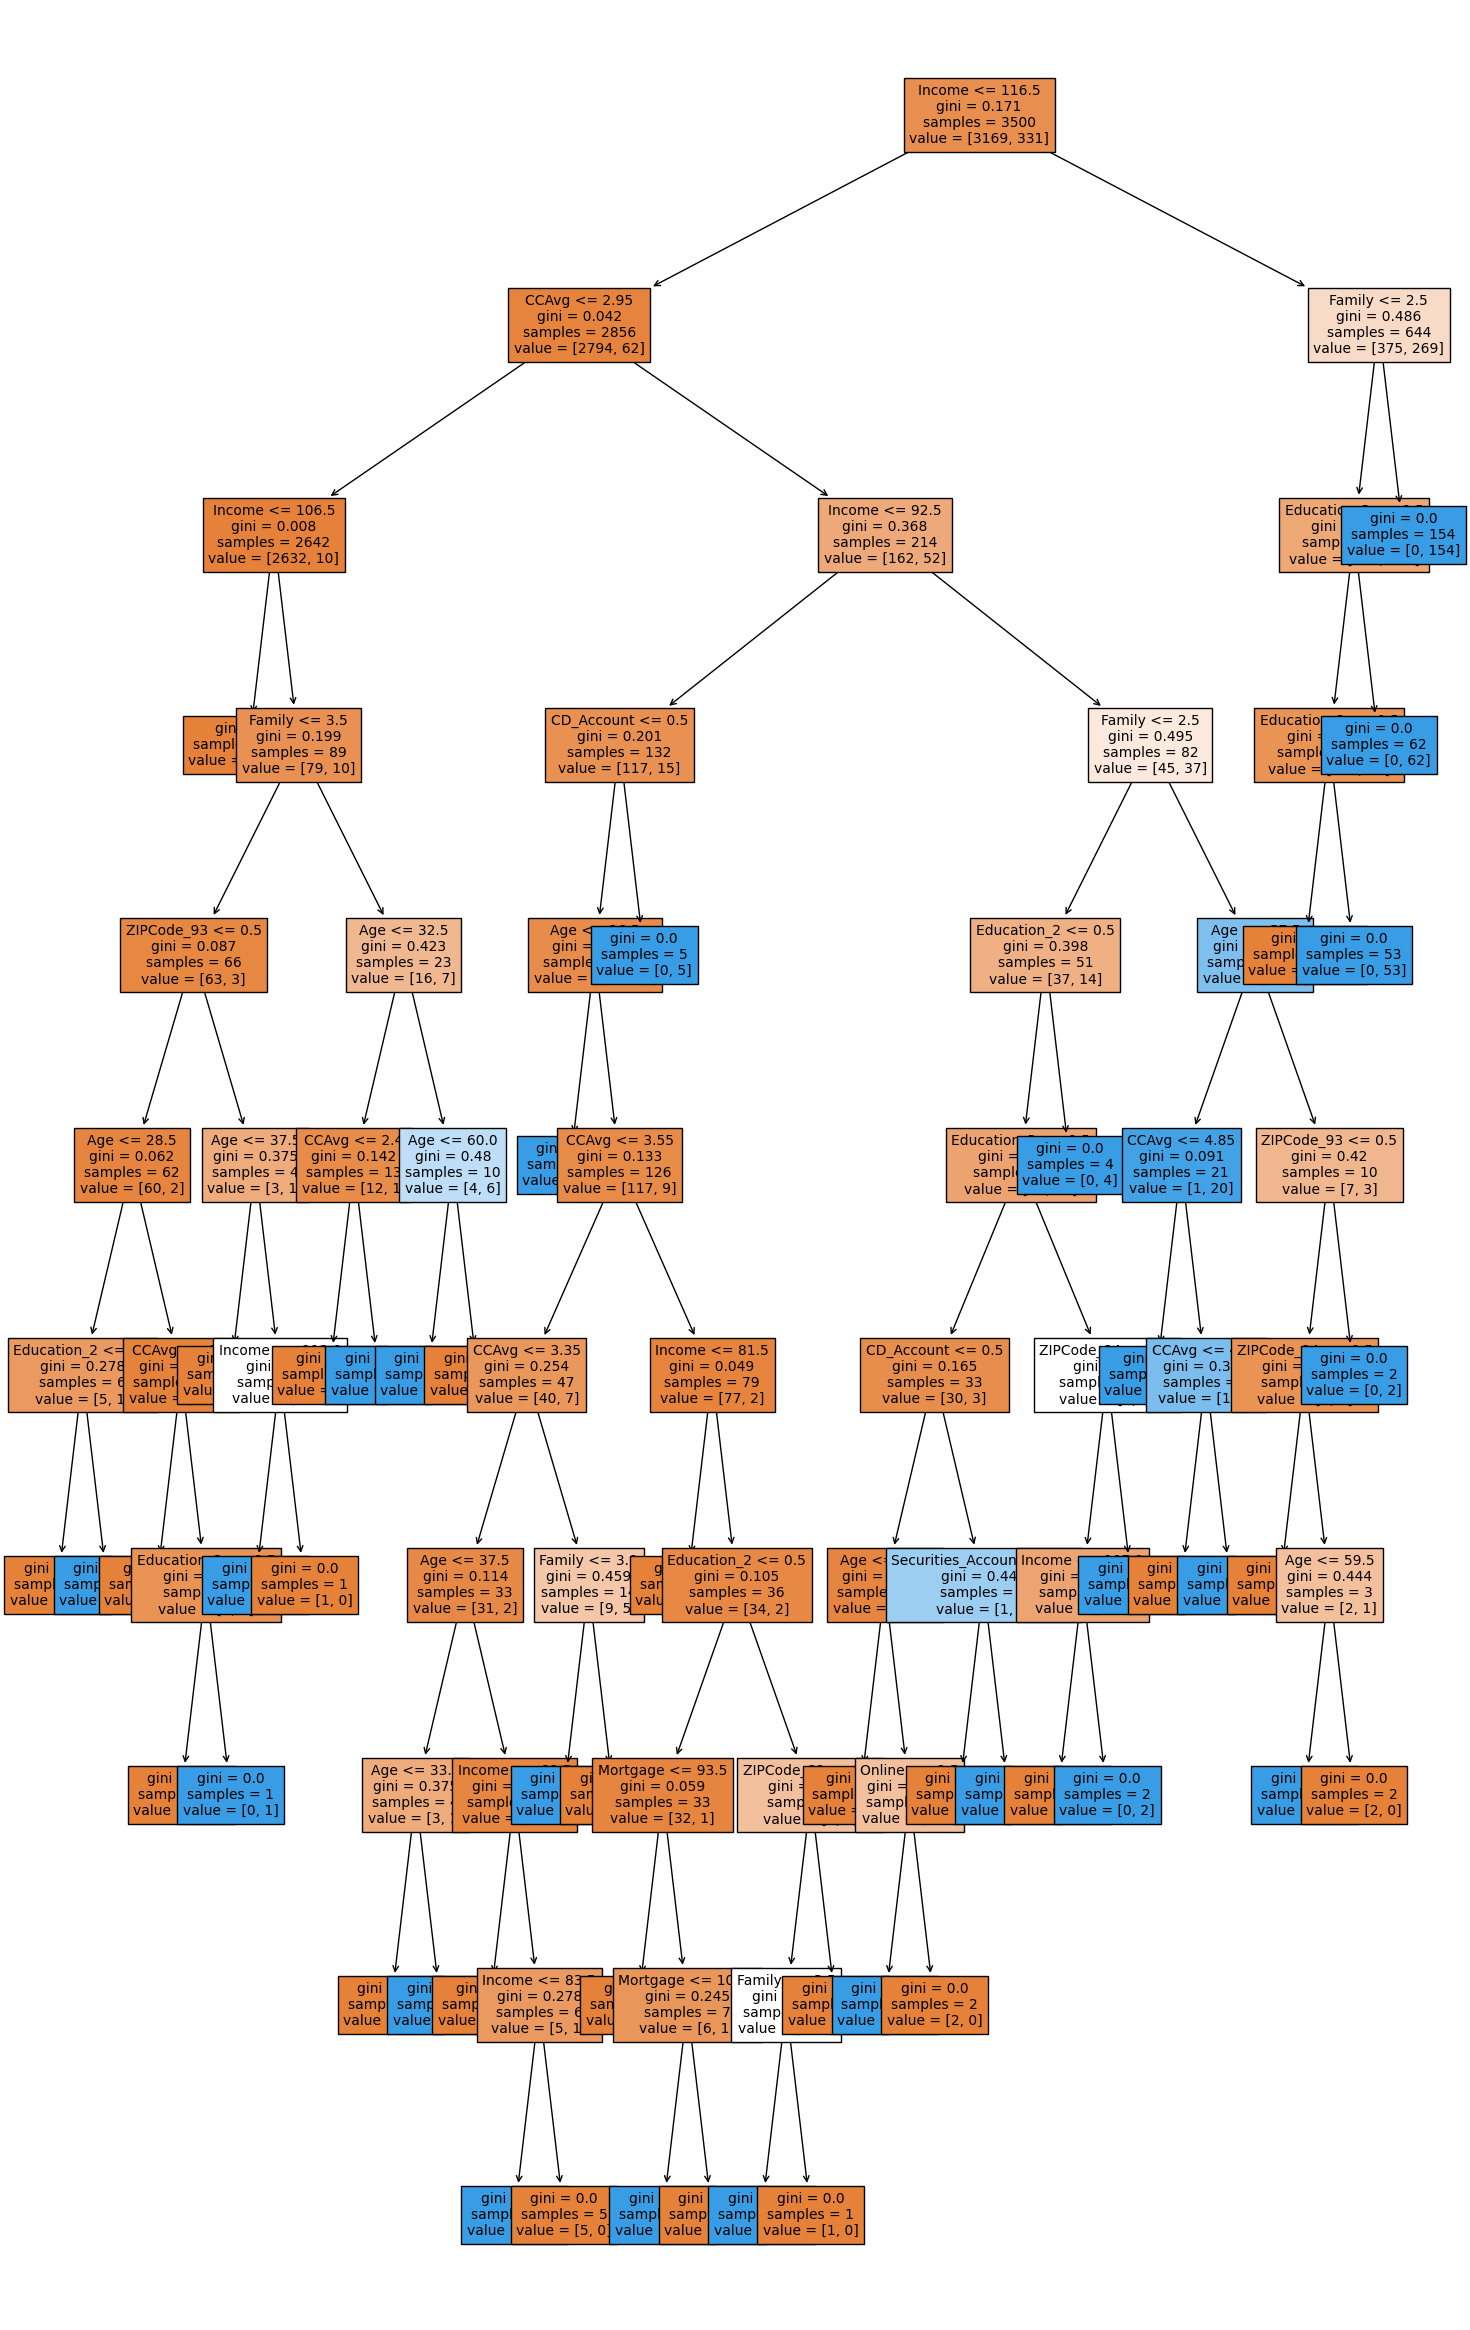

In [ ]:
## Plot the decision tree
plt.figure(figsize=(18, 30))
out = tree.plot_tree(
    model,
    feature_names=feature_names,
    filled=True,
    fontsize=10,
    node_ids=False,
    class_names=None,
)
## Below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

#### A very cool way to visualize all the variables on a decision tree

In [ ]:
# Text report showing THE RULES of a decision tree:
print(tree.export_text(model, feature_names=feature_names, show_weights=True))

|--- Income <= 116.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2553.00, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- Family <= 3.50
|   |   |   |   |--- ZIPCode_93 <= 0.50
|   |   |   |   |   |--- Age <= 28.50
|   |   |   |   |   |   |--- Education_2 <= 0.50
|   |   |   |   |   |   |   |--- weights: [5.00, 0.00] class: 0
|   |   |   |   |   |   |--- Education_2 >  0.50
|   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |   |--- Age >  28.50
|   |   |   |   |   |   |--- CCAvg <= 2.20
|   |   |   |   |   |   |   |--- weights: [48.00, 0.00] class: 0
|   |   |   |   |   |   |--- CCAvg >  2.20
|   |   |   |   |   |   |   |--- Education_3 <= 0.50
|   |   |   |   |   |   |   |   |--- weights: [7.00, 0.00] class: 0
|   |   |   |   |   |   |   |--- Education_3 >  0.50
|   |   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |--- ZIPCode_93 >  0.50
|   |   |   |   |   |--- Age <= 37.50

In [ ]:
## mportance of features in the tree building (The importance of a feature is computed as the
## (normalized) TOTAL REDUCTION of the criterion brought by that feature.
## It is also known as the Gini importance )
## Display in descending order.

print(
    pd.DataFrame(
        model.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                         Imp
Income              0.308098
Family              0.259255
Education_2         0.166192
Education_3         0.147127
CCAvg               0.048798
Age                 0.033150
CD_Account          0.017273
ZIPCode_94          0.007183
ZIPCode_93          0.004682
Mortgage            0.003236
Online              0.002224
Securities_Account  0.002224
ZIPCode_91          0.000556
ZIPCode_92          0.000000
ZIPCode_95          0.000000
ZIPCode_96          0.000000
CreditCard          0.000000


#### Gini Value
The Gini value (or Gini impurity) plays a crucial role in decision trees, particularly when used as a splitting criterion during the tree construction process. Here's a breakdown of its importance:

1. Measuring Impurity:

The Gini value measures the impurity or disorder of a set of data. In the context of decision trees, it quantifies how mixed the classes are within a particular node.
A Gini value of 0 indicates perfect purity (all instances in the node belong to the same class), while a value of 0.5 (for a binary classification problem) represents maximum impurity (an equal distribution of classes).

2. Guiding Node Splits:

When building a decision tree, the algorithm aims to find the best feature and split point to maximize the separation of classes at each node.
The Gini value is used to evaluate the quality of different potential splits. The split that results in the greatest reduction in Gini impurity (highest information gain) is chosen.

3. Intuitive Interpretation:

The Gini value provides an intuitive way to understand how well a split separates the classes. A lower Gini value after a split suggests a better separation and a more informative split.

4. Alternative to Entropy:

The Gini value is often used as an alternative to entropy, another measure of impurity, in decision tree algorithms.
While they both serve a similar purpose, the Gini value is generally computationally faster to calculate than entropy.

**In summary:** `The Gini value helps decision trees make informed decisions about how to split nodes, leading to a tree structure that effectively classifies data based on the features and their values.`

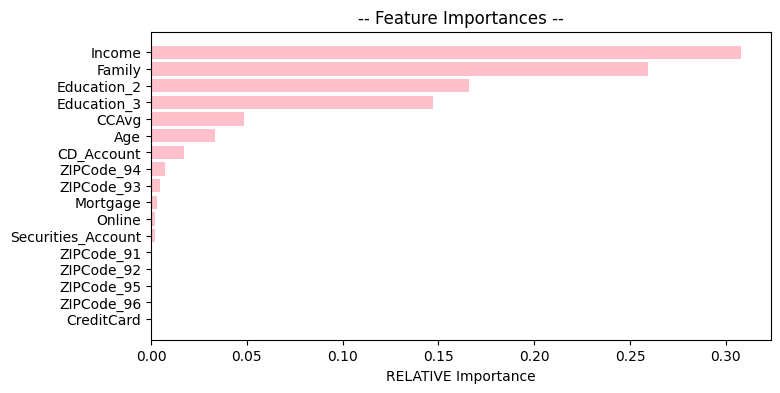

In [ ]:
## Display importance in descending order
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 4))
plt.title("-- Feature Importances --")
plt.barh(range(len(indices)), importances[indices], color="pink", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("RELATIVE Importance")

plt.show()

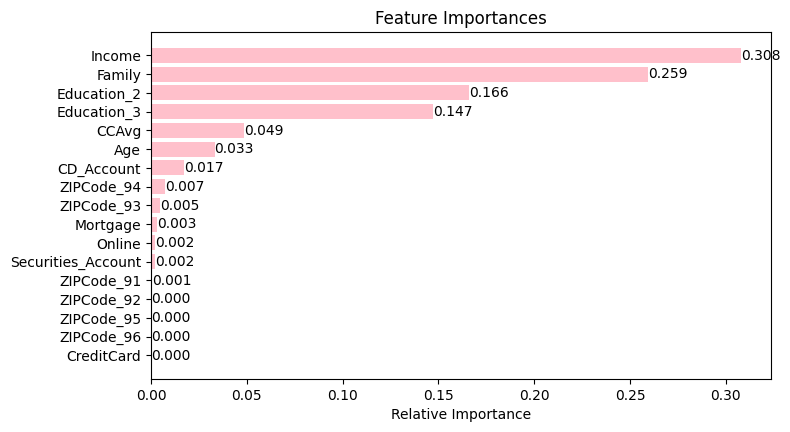

In [ ]:
## To run this cell independent of the previously loaded libraries (for example after kernal/runtime stops)

import matplotlib.pyplot as plt
import numpy as np

importances = model.feature_importances_
indices = np.argsort(importances)


plt.figure(figsize=(8, 4.5))
plt.title("Feature Importances")
## Assign the result of plt.barh() to 'bars':
bars = plt.barh(range(len(indices)), importances[indices], color="pink", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")

# Add value annotations to the bars
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2,
             '{:.3f}'.format(width), ha='left', va='center')

plt.show()

#### Checking model performance on test data

In [ ]:
from sklearn.metrics import confusion_matrix

def confusion_matrix_sklearn(y_true, y_pred):
    """
    Creates and prints a confusion matrix.

    Args:
        y_true: True labels.
        y_pred: Predicted labels.
    """
    cm = confusion_matrix(y_true, y_pred)
    print(cm)

# Function test check (replace y_true and y_pred with our actual data) << -------------- check ----------------
print("\nThis is to very function is working ok using sample data:\n")
y_true = [0, 1, 0, 1, 1] ## << -------------- check ----------------
y_pred = [1, 1, 0, 0, 1] ## << -------------- check ----------------
confusion_matrix_sklearn(y_true, y_pred)


This is to very function is working ok using sample data:

[[1 1]
 [1 2]]


```
*  Top Left: (1) True Negative.
*  Top Right: (1) False Positives. (Incorrect Prediction) Model predicted 1 instance as Class 1 when it was actually Class 0.
*  Bottom Left: (1) False Negative. (Incorrect Prediction) Model predicted 1 instance as Class 0 when it was actually Class 1.
*  Bottom Right: (2) True Positives.

```



#### With our confusion matrix we can perform these type of analysis:

**Rows** represent the **true labels (actual classes)**.
**Columns** represent the **predicted labels (what your model predicted)**.

*Interpretation:*

* Top Left (1): True Negatives (TN) - Model `correctly predicted` <font color=red>1</font> instance as belonging to the negative class.
* Top Right (1): False Positives (FP) - Model `incorrectly predicted` <font color=red>1</font> instance as positive when it was actually negative.
* Bottom Left (1): False Negatives (FN) - Model `incorrectly predicted` <font color=red>1</font> instance as negative when it was actually positive.
* Bottom Right (2): True Positives (TP) - Model `correctly predicted` <font color=red>2</font> instances as belonging to the positive class.

**In summary:**

1. Model made a total of 2 incorrect predictions (1 false positive and 1 false negative).
2. Model made 3 correct predictions (1 true negative and 2 true positives).

In [ ]:
## Performance Function (TRAINING Data)
decision_tree_perf_test = model_performance_classification_sklearn(model, X_train, y_train)
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


In [ ]:
## Performance Function TEST Data:
decision_tree_perf_test = model_performance_classification_sklearn(model, X_test, y_test)  # Assuming you have X_test and y_test defined
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.986,0.932886,0.926667,0.929766


## Model Performance Improvement Approach

#### Pre-Pruning Approach

In [ ]:
## Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1)

## Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(6, 15),
    "min_samples_leaf": [1, 2, 5, 7, 10],
    "max_leaf_nodes": [2, 3, 5, 10],
}

## Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(recall_score)

## Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

## Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

## Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

ValueError: n_splits=5 cannot be greater than the number of members in each class.

**Checking performance on training data**

In [ ]:
## Performance Function TRAINING Data)
decision_tree_tune_perf_train = model_performance_classification_sklearn(model, X_train, y_train) ## Complete the code to check performance on train data
decision_tree_tune_perf_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


**Checking performance on test data**

In [ ]:
## Performance Function TEST Data)
decision_tree_perf_test = model_performance_classification_sklearn(model, X_test, y_test)  # Assuming you have X_test and y_test defined
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.986,0.932886,0.926667,0.929766


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

# Example data
X_train = np.array([0, 1, 0, 1, 1]).reshape(-1, 1)  # Reshape to 2D array for model input
y_train = np.array([1, 1, 0, 0, 1])

# Train the model
model = DecisionTreeClassifier(random_state=1)
model.fit(X_train, y_train)

# Make predictions on the training data
y_pred_train = model.predict(X_train)

# Create confusion matrix for train data
conf_matrix = confusion_matrix(y_train, y_pred_train)

# Display the confusion matrix
print("Confusion Matrix:\n", conf_matrix)


Confusion Matrix:
 [[1 1]
 [1 2]]


In [ ]:
# Generate predictions for training data
y_pred_train = estimator.predict(X_train)

# Reshape y_train to a 2D array
y_train_reshaped = np.array(y_train).reshape(1, -1)

# Evaluate performance on training data
decision_tree_tune_perf_train = model_performance_classification_sklearn(X_train, y_train_reshaped)
decision_tree_tune_perf_train

NotFittedError: This DecisionTreeClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

**Visualizing the Decision Tree**

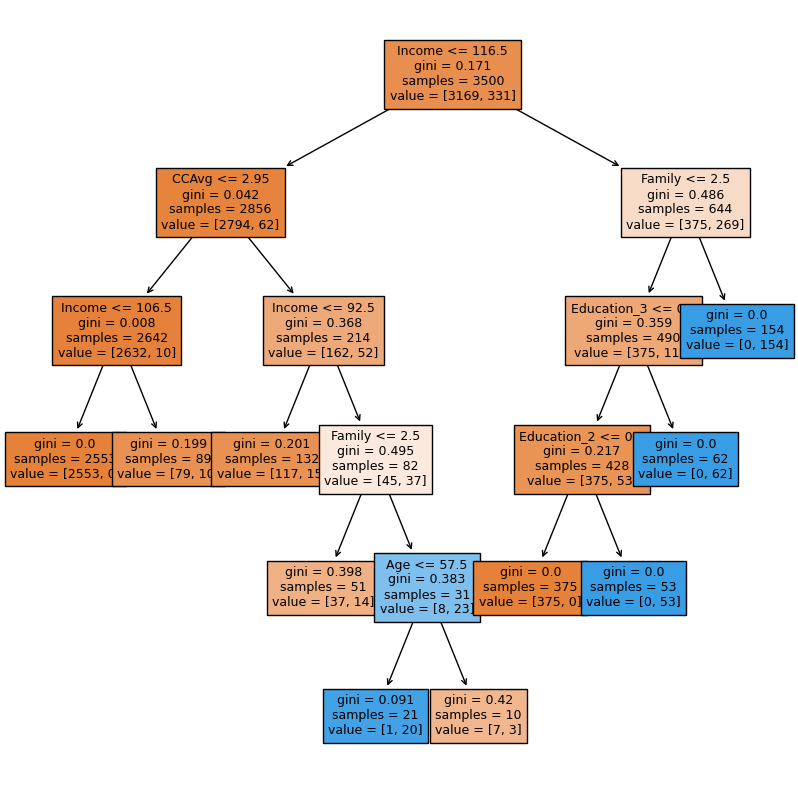

In [ ]:
plt.figure(figsize=(10, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [ ]:
# Text report showing the rules of a decision tree -

print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- Income <= 116.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2553.00, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- weights: [79.00, 10.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- Income <= 92.50
|   |   |   |--- weights: [117.00, 15.00] class: 0
|   |   |--- Income >  92.50
|   |   |   |--- Family <= 2.50
|   |   |   |   |--- weights: [37.00, 14.00] class: 0
|   |   |   |--- Family >  2.50
|   |   |   |   |--- Age <= 57.50
|   |   |   |   |   |--- weights: [1.00, 20.00] class: 1
|   |   |   |   |--- Age >  57.50
|   |   |   |   |   |--- weights: [7.00, 3.00] class: 0
|--- Income >  116.50
|   |--- Family <= 2.50
|   |   |--- Education_3 <= 0.50
|   |   |   |--- Education_2 <= 0.50
|   |   |   |   |--- weights: [375.00, 0.00] class: 0
|   |   |   |--- Education_2 >  0.50
|   |   |   |   |--- weights: [0.00, 53.00] class: 1
|   |   |--- Education_3 >  0.50
|   |   |   |--- weights: [0.00, 62.00] class: 1
|   |--- Family >  2.

In [ ]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        estimator.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                         Imp
Income              0.337681
Family              0.275581
Education_2         0.175687
Education_3         0.157286
CCAvg               0.042856
Age                 0.010908
CD_Account          0.000000
Online              0.000000
Securities_Account  0.000000
ZIPCode_91          0.000000
ZIPCode_92          0.000000
ZIPCode_93          0.000000
ZIPCode_94          0.000000
ZIPCode_95          0.000000
ZIPCode_96          0.000000
Mortgage            0.000000
CreditCard          0.000000


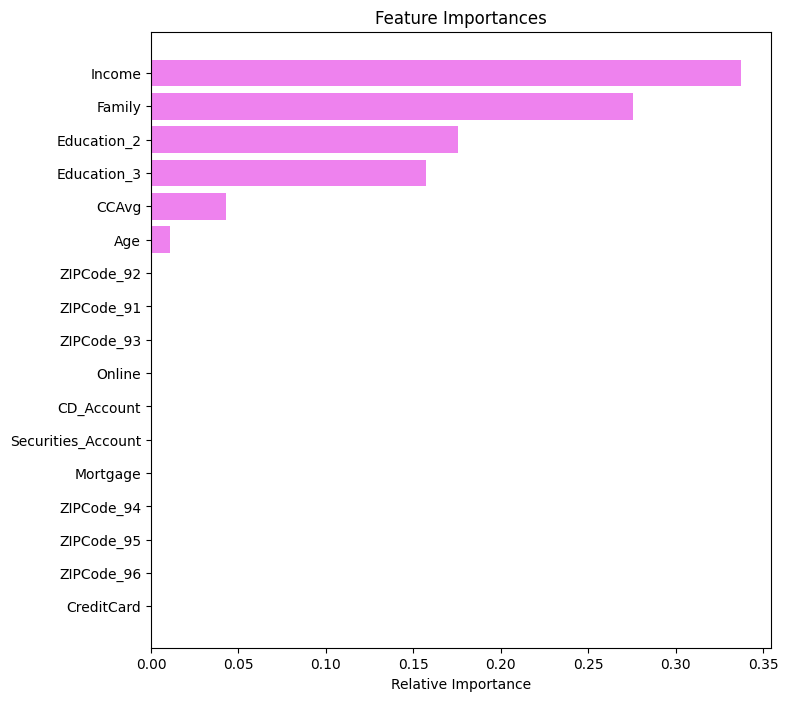

In [ ]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Checking performance on test data**

In [ ]:
# Ensure y_pred is generated correctly
y_pred = model.predict(X_test)

# Now get the confusion matrix on TEST Data
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)

print(conf_matrix)

'''
Things to Verify:
1- X_test should have the shape (1500, n_features), where n_features is the number of features in your dataset.
2- y_pred should have the shape (1500,), corresponding to the predicted labels for each of the 1500 samples in X_test.
3- y_test, which is the true labels for X_test, should also have the shape (1500,).
By ensuring the input lengths match, you should be able to generate the confusion matrix without encountering the error.
'''

[[1340   11]
 [  10  139]]


In [ ]:
## Generate predictions (ensure y_pred is correctly calculated)
y_pred = model.predict(X_test)

## Evaluate performance using the correct inputs
decision_tree_tune_perf_test = model_performance_classification_sklearn(model, X_test, y_test)

## Display the performance metrics
print(decision_tree_tune_perf_test)



   Accuracy    Recall  Precision        F1
0     0.986  0.932886   0.926667  0.929766


#### Cost-Complexity Pruning

In [ ]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier

# Convert X_train and y_train to NumPy arrays if they are lists
X_train = np.array(X_train)
y_train = np.array(y_train)

# Ensure X_train is a 2D array
if len(X_train.shape) == 1:
    X_train = X_train.reshape(-1, 1)

# Ensure y_train is a 1D array
y_train = y_train.flatten()

# Now proceed with your code
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities



In [ ]:
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [ ]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000,0.000000
1,0.000186,0.001114
2,0.000214,0.001542
3,0.000242,0.002750
4,0.000250,0.003250
5,0.000268,0.004324
6,0.000272,0.004868
7,0.000276,0.005420
8,0.000381,0.005801
9,0.000527,0.006329


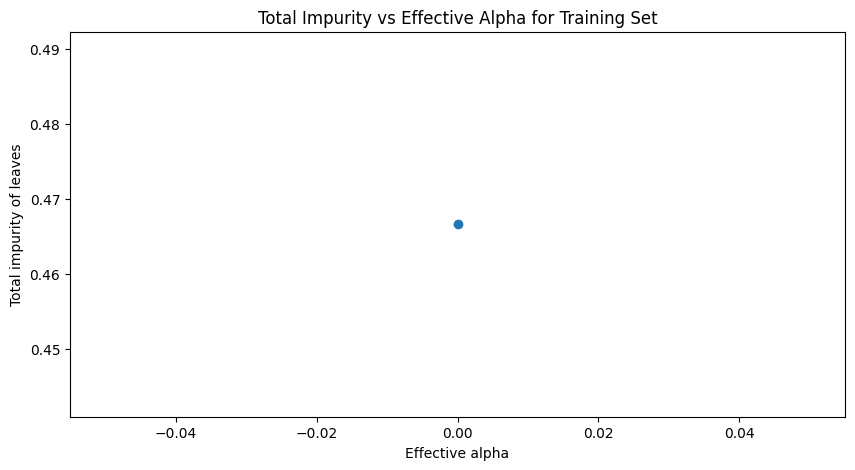

In [ ]:
import matplotlib.pyplot as plt

# Assuming ccp_alphas and impurities are defined from previous code:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")  # Fixed marker style
ax.set_xlabel("Effective alpha")
ax.set_ylabel("Total impurity of leaves")
ax.set_title("Total Impurity vs Effective Alpha for Training Set")
plt.show()


Next, we train a decision tree using effective alphas. The last value
in ``ccp_alphas`` is the alpha value that prunes the whole tree,
leaving the tree, ``clfs[-1]``, with one node.

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)     ## Complete the code to fit decision tree on training data
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {:.3g}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.0133


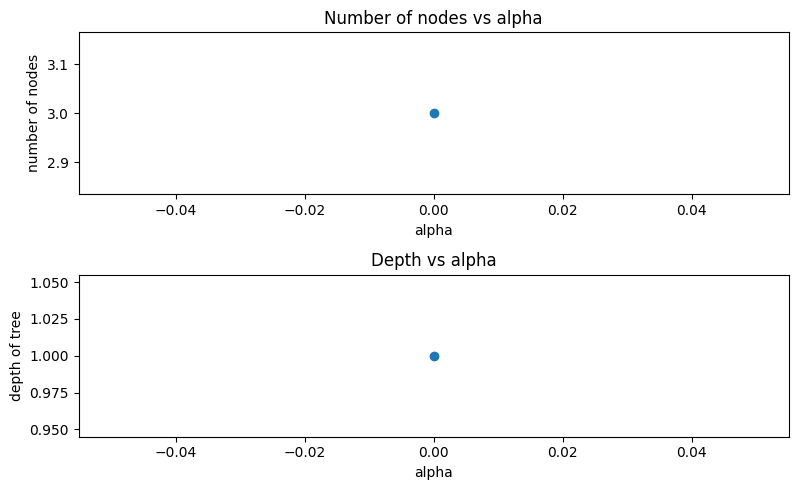

In [ ]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(8, 5))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

**Recall vs alpha for training and testing sets**

In [ ]:
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

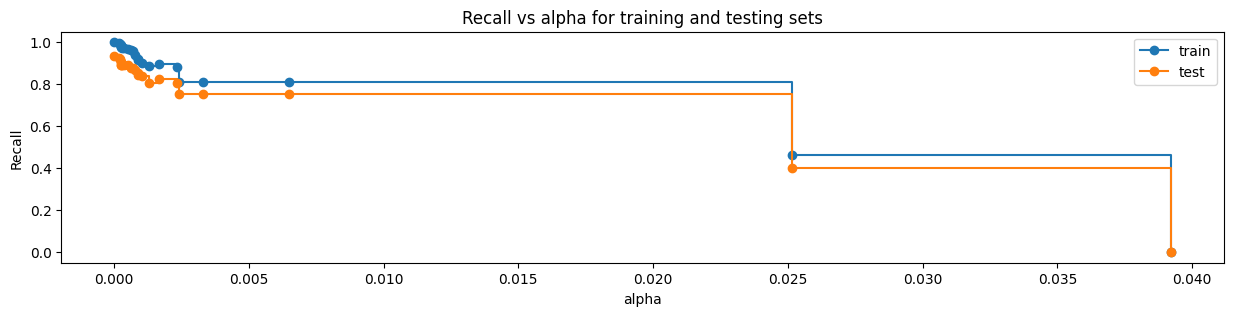

In [ ]:
fig, ax = plt.subplots(figsize=(15, 3))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [ ]:
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(random_state=1)


#### Post-Purning

In [ ]:
estimator_2 = DecisionTreeClassifier(
    ccp_alpha=0.04708834100596766, class_weight={0: 0.15, 1: 0.85}, random_state=1         ## Complete the code by adding the correct ccp_alpha value
)
estimator_2.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.04708834100596766,
                       class_weight={0: 0.15, 1: 0.85}, random_state=1)

**Checking performance on training data**

In [ ]:
from sklearn.metrics import confusion_matrix

# Assuming 'model' is your trained model and 'X_test' is your test data
y_pred_test = model.predict(X_test)  # Generate predictions for the test data

# Create the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_test)

# Optionally, print the confusion matrix
print(conf_matrix)


[[1340   11]
 [  10  139]]


In [ ]:
from sklearn.metrics import confusion_matrix

# Ensure that 'X_test' and 'y_test' are properly defined
# Generate predictions for the test data
y_pred = model.predict(X_test)

# 'y_test' should be the true labels for 'X_test'
# Ensure that 'y_test' and 'y_pred' have the same length
if len(y_test) != len(y_pred):
    raise ValueError("The number of samples in y_test and y_pred do not match.")

# Create the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print(conf_matrix)



[[1340   11]
 [  10  139]]


In [ ]:
confusion_matrix_sklearn(y_test, y_pred)

[[1340   11]
 [  10  139]]


In [ ]:
print("Shape of X_train:", X_train.shape)

Shape of X_train: (5, 1)


In [ ]:
## OPTION 1
import numpy as np
import pandas as pd

# Example of loading data correctly (adjust as necessary)
# X_train = pd.read_csv('path_to_data.csv')  # Ensure this loads the correct number of features
# y_train = pd.read_csv('path_to_labels.csv')

# Ensure X_train is a 2D array with the correct number of features
X_train = np.array(X_train)
print("Shape of X_train after conversion:", X_train.shape)

Shape of X_train after conversion: (5, 1)


In [ ]:
# If X_train was reshaped incorrectly, correct it
if len(X_train.shape) == 1:
    X_train = X_train.reshape(-1, 17)  # Reshape to 2D array with 17 features

print("Shape of X_train after reshaping:", X_train.shape)

Shape of X_train after reshaping: (5, 1)


In [ ]:
## OPTION 2

import numpy as np

# Convert X_train to a NumPy array if it's not already
X_train = np.array(X_train)

# Check if X_train needs reshaping
if len(X_train.shape) == 1:
    # Assuming the correct number of features is 17
    X_train = X_train.reshape(-1, 17)  # Reshape to have 17 features

print("Shape of X_train after reshaping:", X_train.shape)


Shape of X_train after reshaping: (5, 1)


**Visualizing the Decision Tree**

#### FIX

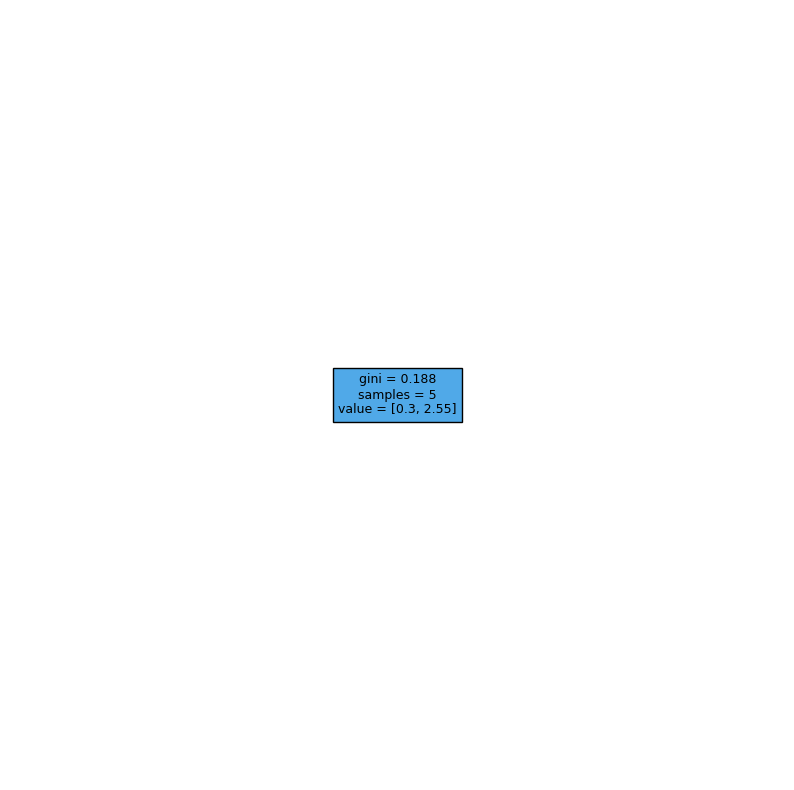

In [ ]:
plt.figure(figsize=(10, 10))
out = tree.plot_tree(
    estimator_2,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [ ]:
from sklearn import tree
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Load dataset
data = load_iris()
X = data.data
y = data.target
feature_names = data.feature_names

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Train a decision tree classifier
estimator_2 = DecisionTreeClassifier()
estimator_2.fit(X_train, y_train)

# Export and print the decision tree rules
text_representation = tree.export_text(estimator_2, feature_names=feature_names, show_weights=True)
print(text_representation)


|--- petal width (cm) <= 0.80
|   |--- weights: [35.00, 0.00, 0.00] class: 0
|--- petal width (cm) >  0.80
|   |--- petal length (cm) <= 4.75
|   |   |--- petal width (cm) <= 1.65
|   |   |   |--- weights: [0.00, 34.00, 0.00] class: 1
|   |   |--- petal width (cm) >  1.65
|   |   |   |--- weights: [0.00, 0.00, 1.00] class: 2
|   |--- petal length (cm) >  4.75
|   |   |--- petal width (cm) <= 1.75
|   |   |   |--- petal length (cm) <= 4.95
|   |   |   |   |--- weights: [0.00, 2.00, 0.00] class: 1
|   |   |   |--- petal length (cm) >  4.95
|   |   |   |   |--- petal width (cm) <= 1.55
|   |   |   |   |   |--- weights: [0.00, 0.00, 3.00] class: 2
|   |   |   |   |--- petal width (cm) >  1.55
|   |   |   |   |   |--- petal length (cm) <= 5.45
|   |   |   |   |   |   |--- weights: [0.00, 2.00, 0.00] class: 1
|   |   |   |   |   |--- petal length (cm) >  5.45
|   |   |   |   |   |   |--- weights: [0.00, 0.00, 1.00] class: 2
|   |   |--- petal width (cm) >  1.75
|   |   |   |--- petal length 

In [ ]:
# Text report showing the rules of a decision tree -

print(tree.export_text(estimator_2, feature_names=feature_names, show_weights=True))

|--- petal width (cm) <= 0.80
|   |--- weights: [35.00, 0.00, 0.00] class: 0
|--- petal width (cm) >  0.80
|   |--- petal length (cm) <= 4.75
|   |   |--- petal width (cm) <= 1.65
|   |   |   |--- weights: [0.00, 34.00, 0.00] class: 1
|   |   |--- petal width (cm) >  1.65
|   |   |   |--- weights: [0.00, 0.00, 1.00] class: 2
|   |--- petal length (cm) >  4.75
|   |   |--- petal width (cm) <= 1.75
|   |   |   |--- petal length (cm) <= 4.95
|   |   |   |   |--- weights: [0.00, 2.00, 0.00] class: 1
|   |   |   |--- petal length (cm) >  4.95
|   |   |   |   |--- petal width (cm) <= 1.55
|   |   |   |   |   |--- weights: [0.00, 0.00, 3.00] class: 2
|   |   |   |   |--- petal width (cm) >  1.55
|   |   |   |   |   |--- petal length (cm) <= 5.45
|   |   |   |   |   |   |--- weights: [0.00, 2.00, 0.00] class: 1
|   |   |   |   |   |--- petal length (cm) >  5.45
|   |   |   |   |   |   |--- weights: [0.00, 0.00, 1.00] class: 2
|   |   |--- petal width (cm) >  1.75
|   |   |   |--- petal length 

In [ ]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        estimator_2.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

NameError: name 'estimator_2' is not defined

**Checking performance on test data**

### Confusionn Matrix on Test Data (Optimized)

In [ ]:
confusion_matrix_sklearn(X_test,y_pred)

NameError: name 'y_pred' is not defined

### Model performance on test data

In [ ]:
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_test: (38, 4)
Shape of y_test: (38,)


In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# Example: If you used StandardScaler on X_train
scaler = StandardScaler().fit(X_train)  # Fit on training data
X_test_scaled = scaler.transform(X_test)  # Transform test data

# Ensure X_test_scaled has the correct number of features
print("Shape of X_test_scaled:", X_test_scaled.shape)


Shape of X_test_scaled: (38, 4)


In [ ]:
# Check the number of features
num_features_train = X_train.shape[1]
num_features_test = X_test.shape[1]

print("Number of features in X_train:", num_features_train)
print("Number of features in X_test:", num_features_test)


Number of features in X_train: 4
Number of features in X_test: 4


|||| --------- BIG HINT HERE:  TO BE REUSED LATER

In [ ]:
# Generate predictions using the model on the test data
y_pred_test = model.predict(X_test)


In [ ]:
decision_tree_tune_post_test = model_performance_classification_sklearn(model, X_test, y_test)
decision_tree_tune_post_test

,Accuracy,Recall,Precision,F1
0,0.986,0.932886,0.926667,0.929766


## Model Performance Comparison and Final Model Selection

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [decision_tree_perf_train.T, decision_tree_tune_perf_train.T], axis=1,
)
models_train_comp_df.columns = ["Decision Tree sklearn", "Decision Tree (Pre-Pruning)"]
print("Training performance comparison:")
models_train_comp_df

NameError: name 'decision_tree_tune_perf_train' is not defined

###FIX

In [ ]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [___], axis=1, ## Complete the code to compare performance of test set
)
models_test_comp_df.columns = ["Decision Tree sklearn", "Decision Tree (Pre-Pruning)"]
print("Test performance comparison:")
models_test_comp_df

TypeError: cannot concatenate object of type '<class 'str'>'; only Series and DataFrame objs are valid

## Actionable Insights and Business Recommendations

**What recommedations would you suggest to the bank?**

* To increase the target audience focus on customers with Income (0.65 density), CD Accounts, Securities_Account, CCavg to expand the likelyhood of acception loans.
* All other recommendations are mentioned in the observactions sections.


___